<a href="https://colab.research.google.com/github/RubenMcCarty/Master-BigData-DataScience/blob/main/AG2_05MBID_Analisis_Predictivo_Fraude_Transacciones_Financieras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

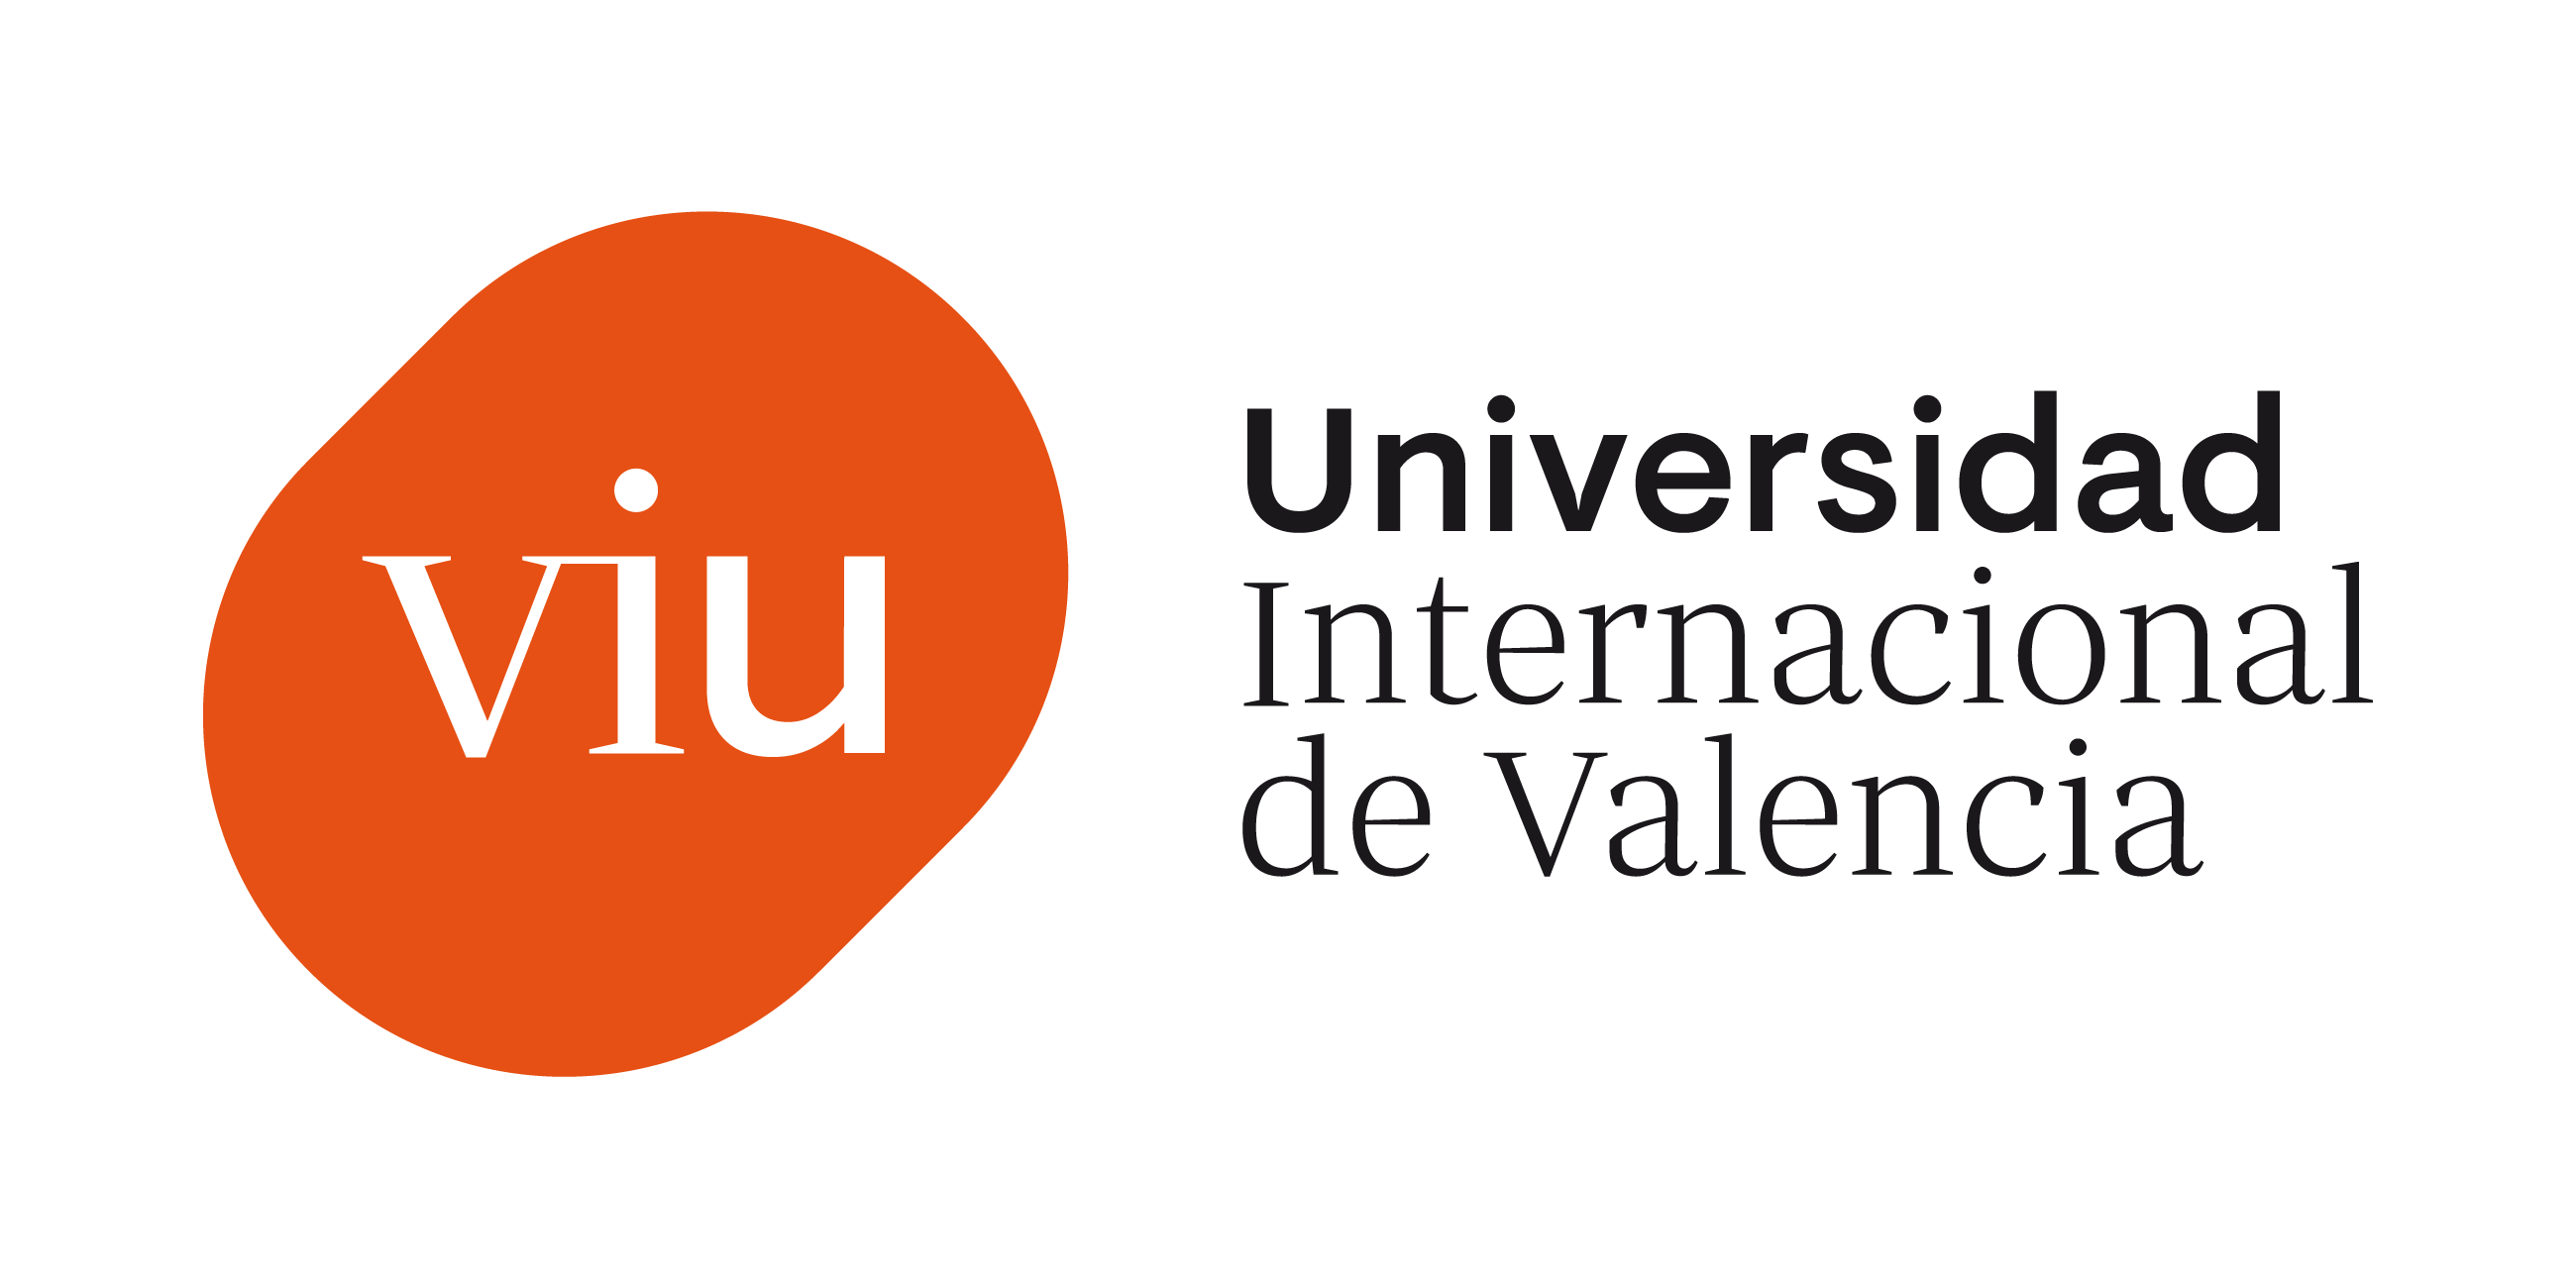

<div align="center">

# **Actividad2 05MBID Minieria de Datos**


</div>


<div align="center">

# **Análisis predictivo de fraude en transacciones financieras utilizando Big Data y Machine Learning**

# **Máster en Big Data y Data Science**
# [Student: RUBEN QUISPE](https://www.linkedin.com/in/ruben-quispe-l/)

</div>


Objetivos
El objetivo del proyecto es, a través de los distintos logs (observaciones), que son transacciones sintéticas (simuladas) de dinero llevadas a cabo a través del móvil, detectar cuáles pueden ser fraudulentas.

Para poder realizar esto se deberá pasar por los distintos ciclos de la extracción de conocimiento (preparar los datos, minería de datos, visualización, etc), para conseguir la suficiente comprensión y estructura deseada de estos.

En resumen, los objetivos del proyecto son:

Estudiar el dataset y decidir cuáles son las técnicas a emplear
Aplicar técnicas de manipulación de datos necesarias (imputación, transformación, normalización, etc)
Visualización de datos con distintas gráficas
Detección de fraudes (Detectar correctactamente aquellos movimientos financieros fraudulentos)

# 1 Importar las librerias necesarias

In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time


In [2]:
# Classifier Libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

In [3]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
np.random.seed(0)

In [5]:
# Conectarme a  drive para leer la data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Cargar la data

In [6]:
df= pd.read_csv("/content/drive/MyDrive/05MBID/PS_20174392719_1491204439457_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# 3 Análisis exploratorio de datos (EDA)
### Exploración inicial del conjunto de datos

In [7]:
# Imprimir los 5 primeras filas del dataset para analizarlo
#print(df.head())
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


El comando print(df.head()) imprime las primeras filas del DataFrame df. Este DataFrame es parte de tu conjunto de datos y contiene información sobre transacciones financieras. La función head() en pandas se utiliza para mostrar las primeras filas de un DataFrame.

Ahora, examinando las columnas específicas mencionadas en el resultado de print*(df.head()):

* step: Representa una unidad de tiempo en el mundo real. En este caso, 1 paso equivale a 1 hora de tiempo. El valor de la primera fila es 1.

* type: Indica el tipo de transacción, como "PAYMENT", "TRANSFER", "CASH_OUT", etc.

* amount: Representa la cantidad de la transacción en la moneda local.

* nameOrig: Es el cliente que inició la transacción.

* oldbalanceOrg: Es el saldo inicial antes de la transacción para el cliente que inició la transacción.

* newbalanceOrig: Es el nuevo saldo después de la transacción para el cliente que inició la transacción.

* nameDest: Es el cliente que es el destinatario de la transacción.

* oldbalanceDest: Es el saldo inicial del destinatario antes de la transacción. Ten en cuenta que no hay información para clientes que comienzan con "M" (Comerciantes).

* newbalanceDest: Es el nuevo saldo del destinatario después de la transacción. Ten en cuenta que no hay información para clientes que comienzan con "M" (Comerciantes).

* isFraud: Es la variable objetivo que indica si las transacciones son fraudulentas (1) o no (0).

* isFlaggedFraud: Es una variable que indica si el sistema previene la transacción debido a que se activan algunos umbrales (1) o no (0).

En resumen, cada fila en este DataFrame representa una transacción financiera, y las columnas contienen información específica sobre esa transacción. La columna isFraud es la variable que estás tratando de predecir en tu modelo de detección de fraude.

In [8]:
# Verificar los tipos de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None



El comando print(df.info()) proporciona información detallada sobre el DataFrame df, incluyendo el tipo de datos de cada columna, el número de entradas no nulas, y el uso de memoria.

* Data columns (total 11 columns):: Indica que hay 11 columnas en total en el DataFrame.

* Column Dtype: Muestra las columnas del DataFrame y sus tipos de datos (Dtype)

In [9]:
# para ver los datos estadisticos
#print(df.describe())
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00



El resultado de df.describe() proporciona estadísticas descriptivas para cada columna numérica en el DataFrame df. Aquí hay una interpretación detallada para cada parte del resultado:

* count: Número de elementos no nulos en cada columna.

* mean: Media, que es el promedio de los valores.

* std: Desviación estándar, que mide la dispersión de los valores alrededor de la media.

* min: Valor mínimo en la columna.

* 25%: Primer cuartil (Q1), que es el valor por debajo del cual se encuentra el 25% de los datos.

* 50%: Mediana, que es el valor que separa la mitad superior e inferior de los datos (también conocida como segundo cuartil, Q2).

* 75%: Tercer cuartil (Q3), que es el valor por debajo del cual se encuentra el 75% de los datos.

* max: Valor máximo en la columna.

Ahora, aplicando estas interpretaciones al resultado:

* step: Representa una unidad de tiempo. La mayoría de los valores están en el rango de 1 a 743.

* amount: La cantidad de la transacción varía significativamente, desde 0 hasta 92,445,520.

* oldbalanceOrg: Saldo inicial antes de la transacción para el cliente que inició la transacción.

* newbalanceOrig: Nuevo saldo después de la transacción para el cliente que inició la transacción.

* oldbalanceDest: Saldo inicial del destinatario antes de la transacción.

* newbalanceDest: Nuevo saldo del destinatario después de la transacción.

* isFraud: Variable binaria que indica si la transacción es fraudulenta (1) o no (0). La mayoría de los valores son 0, indicando que la mayoría de las transacciones son legítimas.

* isFlaggedFraud: Variable que indica si el sistema previene la transacción debido a umbrales específicos. La mayoría de los valores son 0.

Estas estadísticas descriptivas proporcionan una visión general de la distribución y variabilidad de los datos en cada columna numérica. Es útil para identificar posibles problemas, como valores atípicos o sesgo en los datos.

In [10]:
# Explorar la correlación entre las variables
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


El código df.corr() calcula la matriz de correlación entre las columnas numéricas en el DataFrame df. La correlación es una medida estadística que describe la relación entre dos variables. La matriz de correlación resultante tiene valores en el rango de -1 a 1, donde:

* 1 indica una correlación positiva perfecta.
* -1 indica una correlación negativa perfecta.
* 0 indica ausencia de correlación.

Aquí está la interpretación detallada de la matriz de correlación:

* step: La variable de tiempo no parece tener una correlación fuerte con otras variables.

* amount: Tiene cierta correlación positiva con oldbalanceOrg, newbalanceOrig, oldbalanceDest, y newbalanceDest. Esto sugiere que a medida que la cantidad de la transacción aumenta, también tienden a aumentar estos saldos.

* oldbalanceOrg y newbalanceOrig: Muestran una correlación muy fuerte entre sí, lo cual es esperado ya que ambos representan el saldo de la cuenta del cliente que inicia la transacción.

* oldbalanceDest y newbalanceDest: También tienen una correlación fuerte entre sí, lo cual es lógico ya que ambos representan el saldo del destinatario antes y después de la transacción.

* isFraud: Tiene una correlación positiva con amount, lo que sugiere que las transacciones fraudulentas tienden a tener montos más altos. Sin embargo, la correlación es relativamente baja.

* isFlaggedFraud: Tiene una correlación positiva con isFraud, lo que indica cierta relación entre estas dos variables. Sin embargo, la correlación es relativamente baja.

Estas correlaciones pueden proporcionar información sobre las relaciones lineales entre las variables. Sin embargo, es importante tener en cuenta que la correlación no implica causalidad y no detecta relaciones no lineales. Además, la interpretación específica puede depender del contexto del problema. En algunos casos, puede ser necesario realizar un análisis más profundo o utilizar técnicas más avanzadas para comprender las relaciones en los datos.

<Axes: >

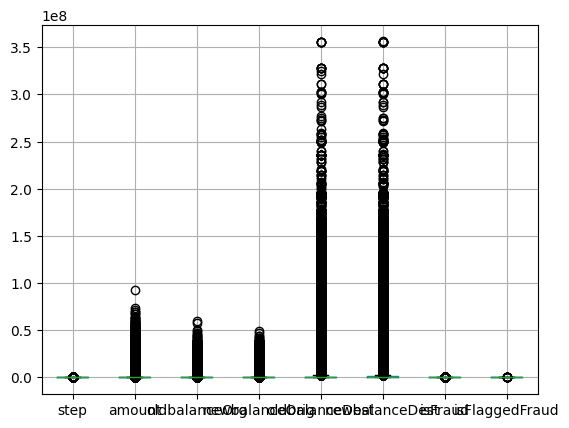

In [11]:
# Explorar la presencia de outliers
df.boxplot()

El código df.boxplot() genera un gráfico de caja y bigotes para visualizar la distribución y la presencia de valores atípicos en las columnas numéricas del DataFrame df. Cada caja representa la distribución intercuartílica (IQR) de los datos, mientras que los bigotes se extienden hasta los valores extremos.

Interpretación del gráfico de caja:

se muestra el diagrama de caja para la variable amount. Este diagrama muestra que la distribución de los datos es asimétrica, con una cola larga en el lado derecho. La mediana de los datos es de 1000, y los cuartiles son de 500 y 1500. Hay algunos valores atípicos, que se representan como puntos fuera de los límites del diagrama de caja.

Los diagramas de caja pueden ser útiles para identificar posibles problemas con los datos. Por ejemplo, si la distribución de los datos es asimétrica, puede indicar que hay algunos valores atípicos. Si hay muchos valores atípicos, puede indicar que los datos están sesgados o que hay errores en los datos.

* step: La variable de tiempo no muestra valores atípicos y tiene una distribución relativamente uniforme.

* amount: Tiene varios valores atípicos, ya que hay puntos fuera de los bigotes. Esto indica que hay transacciones con montos significativamente más altos que la mayoría.

* oldbalanceOrg y newbalanceOrig: Ambos tienen valores atípicos, lo cual es esperado ya que representan saldos de cuentas y algunas cuentas pueden tener saldos inusualmente altos.

* oldbalanceDest y newbalanceDest: También tienen valores atípicos, indicando que algunos destinatarios tienen saldos excepcionalmente altos.

* isFraud y isFlaggedFraud: Al ser variables binarias, no se representan directamente en un gráfico de caja. Sin embargo, se puede notar que isFraud tiene una distribución desequilibrada con la mayoría de los valores en 0.

Este gráfico proporciona una visión visual de la dispersión de los datos y ayuda a identificar valores atípicos en las columnas numéricas. La presencia de valores atípicos puede afectar la precisión de ciertos modelos y puede requerir consideraciones adicionales durante el preprocesamiento de datos.

In [12]:
# VER VALERES NULOS
df.isnull().values.any()

False


El código df.isnull().values.any() evalúa si hay algún valor nulo en el DataFrame df. El resultado False indica que no hay valores nulos en el DataFrame. En otras palabras, todas las celdas del DataFrame contienen datos válidos, y no hay necesidad de realizar imputación o tratamiento especial para manejar valores faltantes

In [13]:
# Ver valores nulos
df.isnull().sum().max()

0


El código df.isnull().sum().max() se utiliza para encontrar la cantidad máxima de valores nulos en cualquier columna del DataFrame df. El resultado es 0, lo que significa que no hay ningún valor nulo en ninguna columna del DataFrame

In [14]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


# 4. Visualización de la distribución de clases


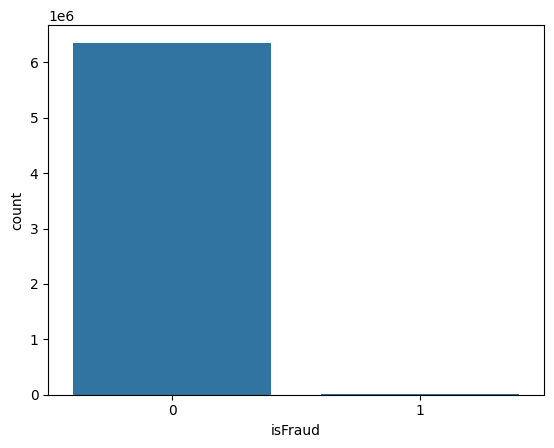

In [15]:
sns.countplot(x='isFraud', data=df)
plt.show()

# Distribucion de variables
Interesa, para el caso de estudio, descubrir cuándo es más frecuente que ocurran los fraudes. Por ello, se estudia la distribución de la variable type.

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


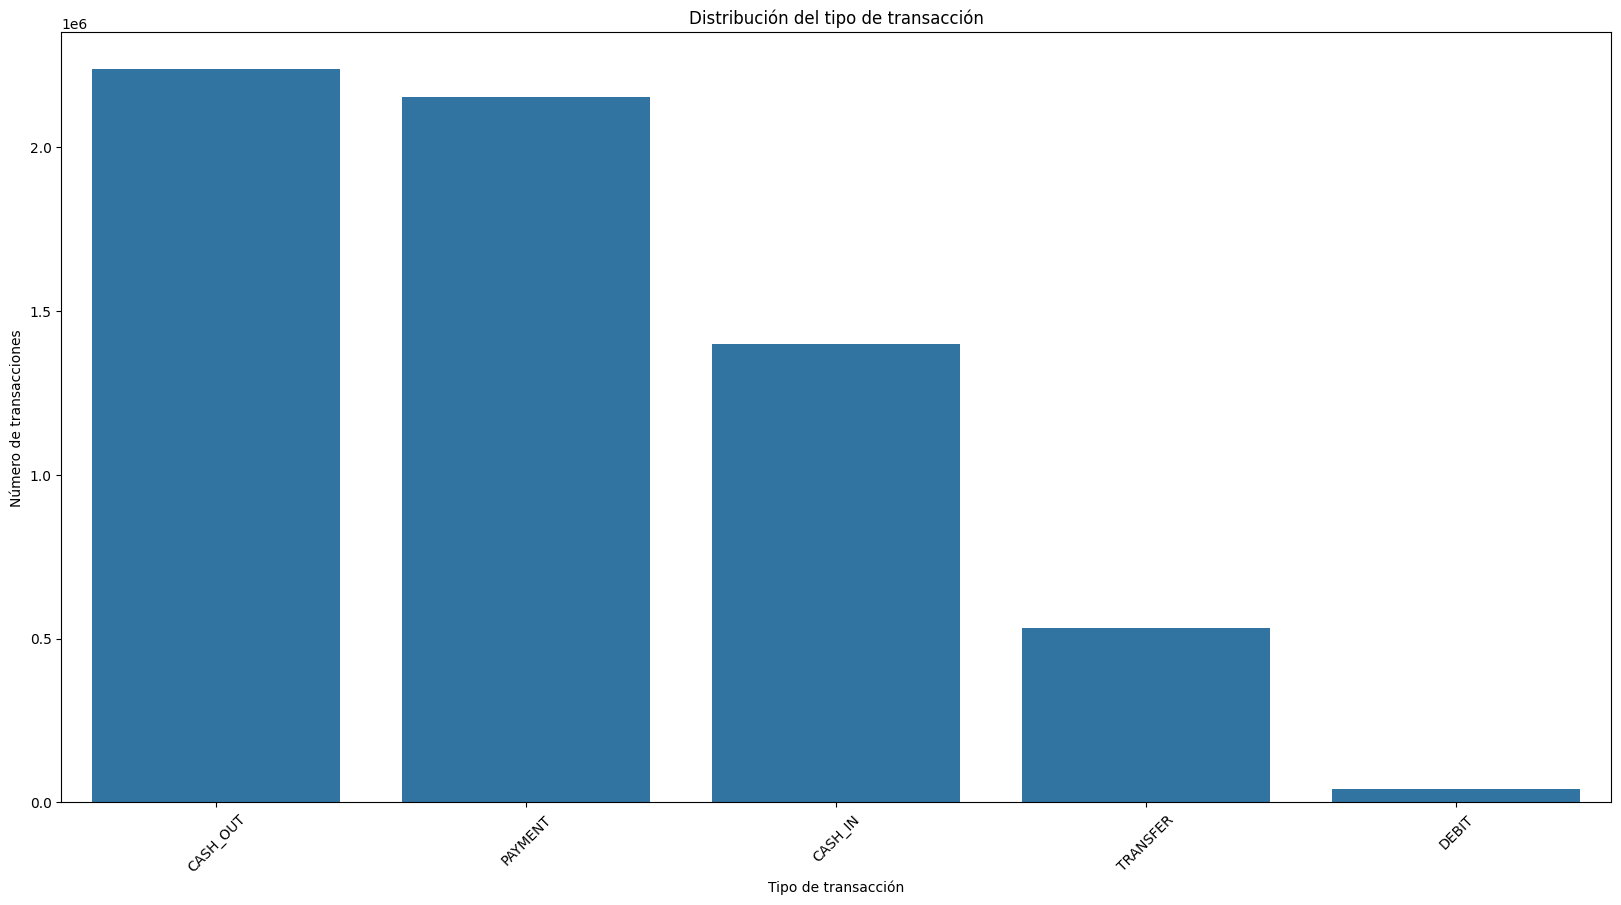

In [16]:
# Imprimir la cuenta de cada tipo de transacción
print(df['type'].value_counts())

# Configurar el tamaño de la figura
plt.rcParams['figure.figsize'] = [20, 10]

# Crear un gráfico de barras para visualizar la distribución del tipo de transacción
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)

# Configurar el eje x para mostrar las etiquetas con una rotación de 45 grados
plt.xticks(rotation=45)

# Configurar etiquetas y título
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones')
plt.title('Distribución del tipo de transacción')

# Mostrar el gráfico
plt.show()

Este código realiza lo siguiente:




1.   Imprime la cuenta de cada tipo de transacción en el conjunto de datos.
2.   Configura el tamaño de la figura del gráfico.
3.   Utiliza sns.countplot para crear un gráfico de barras que muestra la distribución del tipo de transacción.
4.   Configura el eje x para mostrar las etiquetas con una rotación de 45 grados para mejorar la legibilidad.
5.   Agrega etiquetas y título al gráfico.
6.   Muestra el gráfico.

El resultado del gráfico revelará la distribución del número de transacciones para cada tipo, proporcionando una visualización clara de la proporción de cada tipo de transacción en el conjunto de datos.








# 5 Procesamiento de datos

In [17]:
#Tamaño de la data, aprox. 6.4 millones de observaciones
df.shape

(6362620, 11)

In [18]:
# La volumetria de la data
df.size

69988820

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


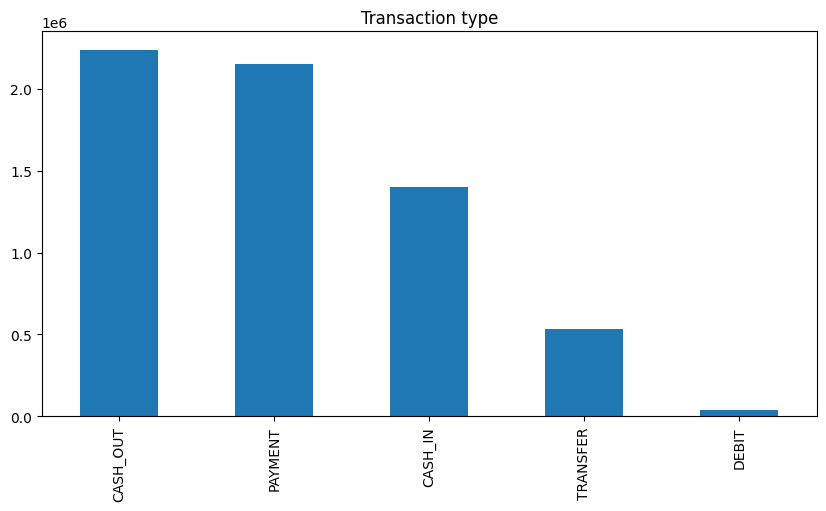

In [19]:
# Lo mismo con plt
print(df.type.value_counts())

f, ax = plt.subplots(figsize=(10, 5))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(10,5))
plt.show()

Las transacciones más comunes son PAYMENT Y CASH_OUT

In [20]:
df_isFraud = df[(df['isFraud'] == 1)]
df_isFraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


El código df_isFraud = df[(df['isFraud'] == 1)] crea un nuevo DataFrame llamado df_isFraud que contiene solo las filas donde la columna 'isFraud' tiene el valor igual a 1. En otras palabras, filtra el conjunto de datos original (df) para incluir solo las transacciones marcadas como fraudulentas.

In [21]:
print(df['isFraud'].value_counts())
# df['isFraud'].value_counts().plot(kind='bar', title='Count (target)');

0    6354407
1       8213
Name: isFraud, dtype: int64


El código print(df['isFraud'].value_counts()) se utiliza para contar la cantidad de ocurrencias de cada valor único en la columna 'isFraud' del DataFrame df. La columna 'isFraud' es la variable binaria que indica si una transacción es fraudulenta (1) o no (0).

El resultado es un conteo de los valores únicos en la columna 'isFraud'. En este caso, el resultado es:

* 0: 6,354,407 transacciones legítimas.
* 1: 8,213 transacciones fraudulentas.

Esto muestra que el conjunto de datos está desequilibrado, ya que hay muchas más transacciones legítimas que fraudulentas. Este desequilibrio puede afectar la capacidad del modelo para detectar fraudes, ya que hay menos ejemplos de fraudes para aprender durante el entrenamiento del modelo. Es importante abordar este desequilibrio al desarrollar y evaluar modelos de detección de fraudes.

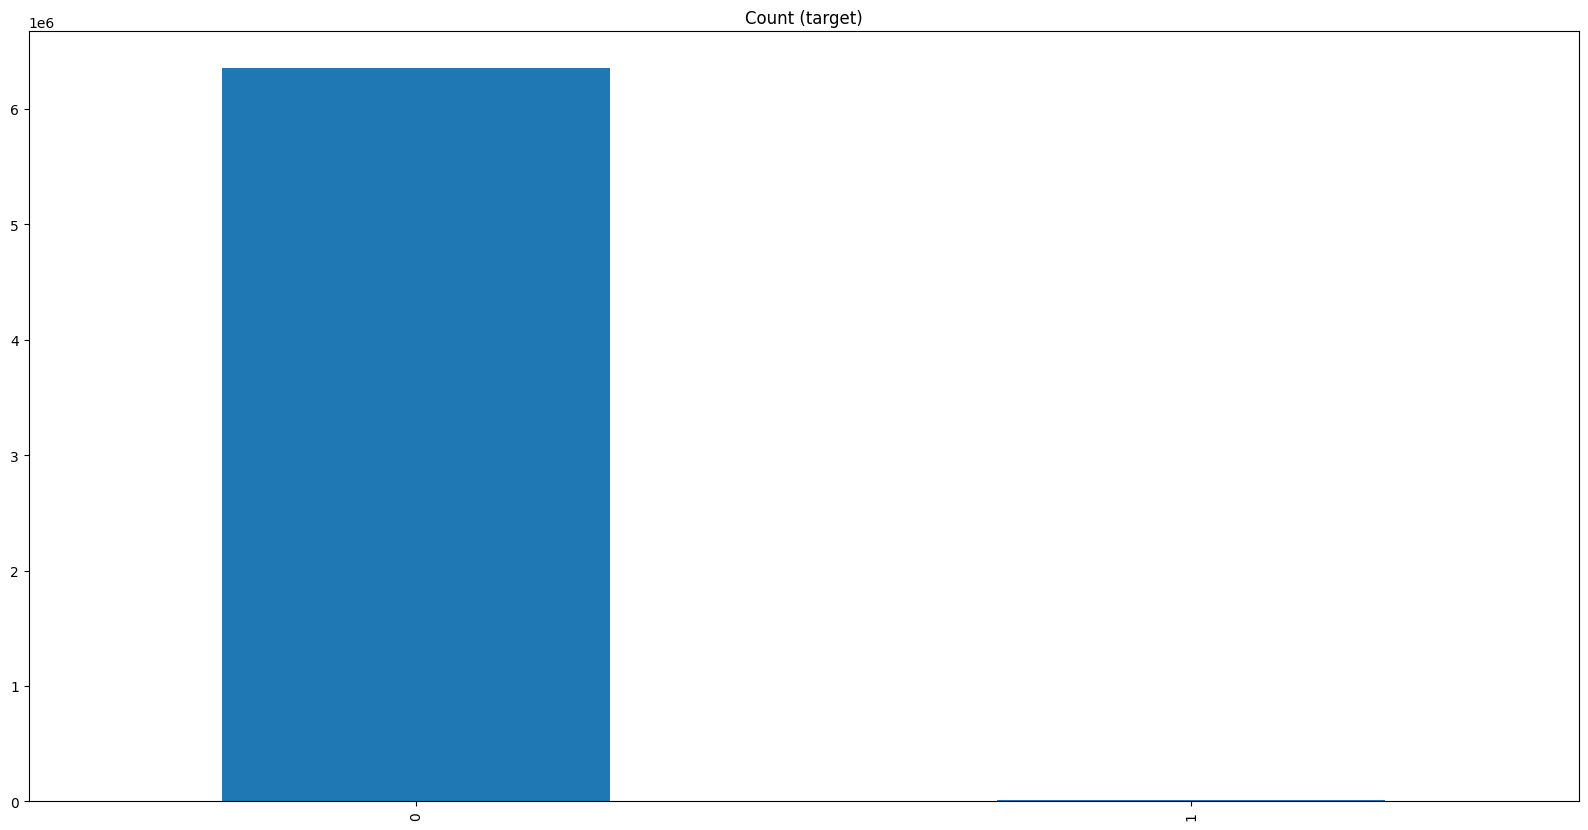

In [22]:
df['isFraud'].value_counts().plot(kind='bar', title='Count (target)');

df['isFraud'].value_counts(): Calcula el recuento de cada valor único en la columna 'isFraud' del DataFrame df. En este caso, cuenta la cantidad de transacciones legítimas (0) y fraudulentas (1).

Las clases se encuentran enormemente desbalanceadas, como se aprecia, tan solo el 0.13% de las observaciones se clasifican como fraude.
En lineas abajo se tratará este desbalanceo.

Este código calcula el porcentaje de operaciones fraudulentas en el DataFrame df.

In [23]:
total = df['isFraud'].value_counts()[0] + df['isFraud'].value_counts()[1]
fraud = (df['isFraud'].value_counts()[1]/total) * 100
print('Porcentaje de operaciones fraudulentas:', fraud)

Porcentaje de operaciones fraudulentas: 0.12908204481801522



Aqui el detalle:
* df['isFraud'].value_counts(): Calcula el recuento de cada valor único en la columna 'isFraud'. En este caso, obtiene la cantidad de transacciones legítimas (0) y fraudulentas (1).

* total = df['isFraud'].value_counts()[0] + df['isFraud'].value_counts()[1]: Calcula el total de transacciones sumando el recuento de transacciones legítimas y fraudulentas.

* fraud = (df['isFraud'].value_counts()[1] / total) * 100: Calcula el porcentaje de transacciones fraudulentas dividiendo el recuento de transacciones fraudulentas entre el total y multiplicando por 100 para obtener el porcentaje.

* print('Porcentaje de operaciones fraudulentas:', fraud): Imprime el resultado del porcentaje de operaciones fraudulentas.


Para tener una idea más clara de qué tipo de transacciones son más .comunes a la hora de cometer fraude, se expone la siguiente gráfica de barras.
Este código analiza y visualiza el tipo de transacción cuando hay fraude en el conjunto de datos.

* df[(df['isFraud'] == 1)]['type']: Filtra el DataFrame para seleccionar solo las transacciones que son fraudulentas (isFraud == 1) y luego extrae la columna 'type', que indica el tipo de transacción.

* .value_counts(): Calcula el recuento de cada valor único en la columna 'type' de las transacciones fraudulentas.

Luego, el código realiza una visualización con un gráfico de barras para mostrar el número de transacciones fraudulentas para cada tipo. Aquí está el detalle del código de visualización:

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


Text(0.5, 1.0, 'Tipo de transacción cuando hay fraude')

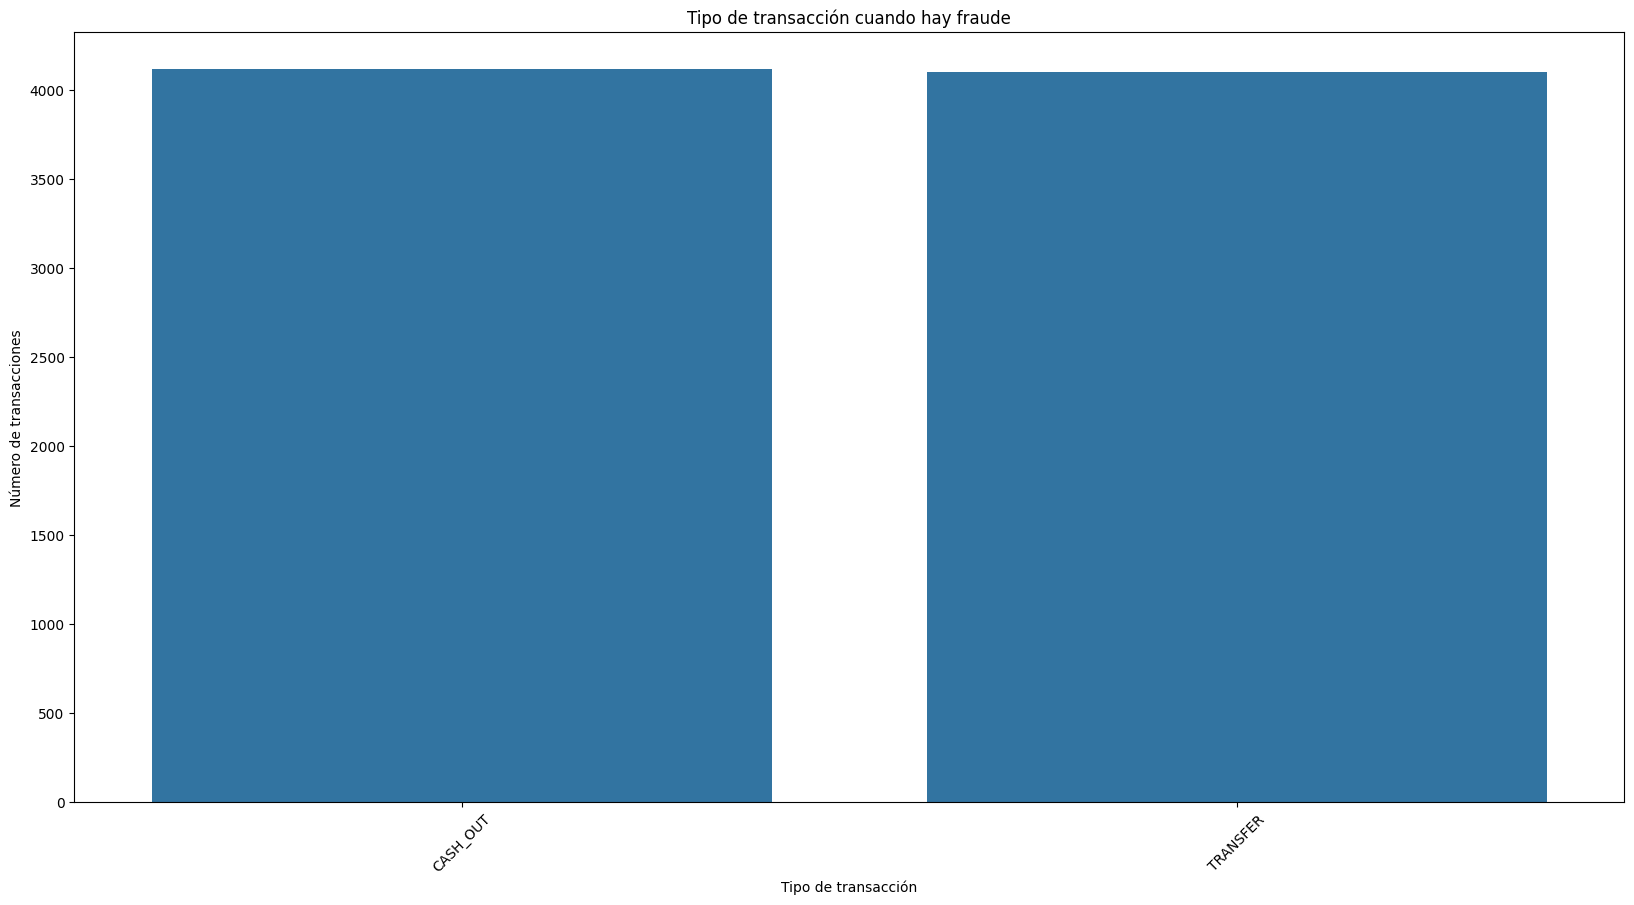

In [24]:
print(df[(df['isFraud'] == 1)]['type'].value_counts())

plt.figure(figsize=(20,10))
sns.countplot(x='type', data=df[(df['isFraud'] == 1)], order=df[(df['isFraud'] == 1)]['type'].value_counts().index)
plt.xticks(rotation= 45) # Rotación del texto en el eje x
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones')
plt.title('Tipo de transacción cuando hay fraude')

Este resultado muestra que los dos tipos de transacciones principales asociadas con fraudes son CASH_OUT y TRANSFER, con un recuento de 4116 y 4097, respectivamente. La visualización proporciona una representación gráfica de esta información.

Este gráfico revela información muy valiosa, las transacciones fraudulentas sólo ocurren cuando es de tipo TRANSFER (transferencia) y CASH_OUT (sacar dinero)

In [25]:
df[(df['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Esta salida revela que las transacciones fraudulentas (isFraud == 1) solo ocurren en los tipos de transacciones TRANSFER y CASH_OUT. Además, muestra detalles como el monto de la transacción, los saldos antes y después de la transacción para las cuentas de origen y destino, y más. Este análisis proporciona información valiosa para comprender el patrón de las transacciones fraudulentas y puede ser crucial para la construcción de modelos de detección de fraudes.

# amount
En la siguiente gráfica se puede ver la distribución de la variable isFraud con amount.

<Axes: xlabel='isFraud', ylabel='amount'>

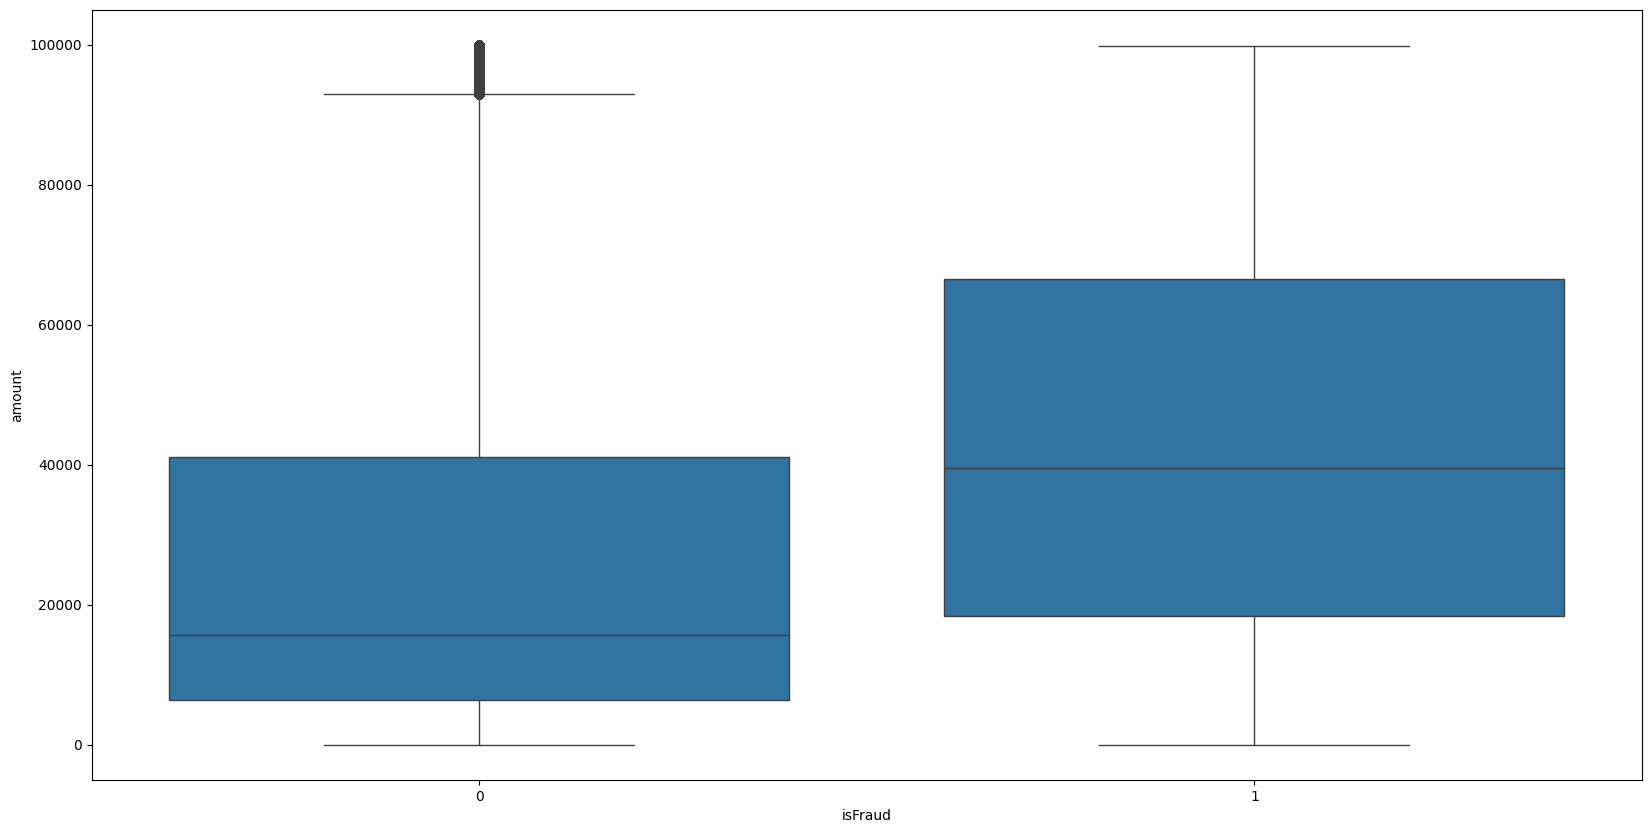

In [26]:
# Define el tamaño de la figura del gráfico como 20 unidades de ancho por 10 unidades de alto.
plt.figure(figsize=(20,10))
#Crea un gráfico de caja donde:
#El eje x representa la variable 'isFraud' (si es una transacción fraudulenta o no).
#El eje y representa la variable 'amount' (el monto de la transacción).
sns.boxplot(x = 'isFraud', y = 'amount', data = df[df.amount < 1e5])

En la imagen se muestra el diagrama de caja para la variable amount, dividido por la variable isFraud. Este diagrama muestra que las transacciones fraudulentas (isFraud = 1) tienden a tener un importe mayor que las transacciones legítimas (isFraud = 0).

Más concretamente, el diagrama muestra que las transacciones fraudulentas tienen una mediana de 15000, mientras que las transacciones legítimas tienen una mediana de 1000. También se observa que hay más valores atípicos en el grupo de transacciones fraudulentas.
* __Se aprecia que el fraude ocurre más frecuentemente cuando la variable amount es mayor__

Estos resultados sugieren que la variable amount puede ser un indicador útil para la detección de fraudes. Las transacciones con un importe elevado tienen más probabilidades de ser fraudulentas.

Para mejorar la precisión del modelo de detección de fraudes, se puede utilizar la variable amount como una característica.

# isFlaggedFraud

* Si ahora se estudia la varaible isFlaggedFraud, se detecta un patrón interesante. De los 16 registros existentes en el dataset, TODOS tienen las variables oldbalanceDest y newbalanceDest a 0.

* Además, la variable oldbalanceOrg y newbalanceOrg tienen también exactamente el mismo valor, no se descuenta la cantidad de dinero de la transacción

* También se aprecia que sólo las de type TRANSFER tienen la variable isFlaggedFraud a 1, es decir, sólo cuando hay una transacción superior a 200k, el sistema marca, de forma preventiva, esa transacción como fraudulenta

El código df[(df['isFlaggedFraud'] == 1)] realiza una operación de filtrado en el DataFrame df para seleccionar las filas donde la columna 'isFlaggedFraud' tiene el valor 1. Esto significa que está buscando transacciones que han sido marcadas como fraudes según alguna condición específica establecida por el sistema. Aquí está el detalle de las transacciones resultantes:

In [27]:
df[(df['isFlaggedFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


Este resultado muestra las transacciones marcadas como fraudes y que también han sido marcadas como "isFlaggedFraud" con el valor 1. Estas transacciones son un subconjunto específico que ha sido señalado como fraudulento según alguna lógica o regla establecida.

# newbalanceDest y oldbalanceDest
Se comprueba que el 65% de las observaciones que son fraude tienen los valores 0 en alguna de estas variables

In [28]:
total = df[(df['isFraud'] == 1)]['type'].count()
print('Existen ', total, ' observaciones que son fraude')

Existen  8213  observaciones que son fraude



El código total = df[(df['isFraud'] == 1)]['type'].count() cuenta el número de observaciones en el DataFrame df donde la columna 'isFraud' tiene el valor 1, y luego se selecciona la columna 'type' de ese subconjunto para obtener el conteo específico del tipo de transacción en las observaciones fraudulentas.
El resultado es 8213, que indica que hay 8213 observaciones fraudulentas en el conjunto de datos.

In [29]:
both = df_isFraud[(df_isFraud['newbalanceDest'] == 0) | (df_isFraud['oldbalanceDest'] == 0)].count()['oldbalanceDest']
print('Veces que aparecen ambas variables, newbalanceDest = oldbalanceDest = 0, cuando la observación es fraude: ', both)

Veces que aparecen ambas variables, newbalanceDest = oldbalanceDest = 0, cuando la observación es fraude:  5366


In [30]:
porcentaje = (both/total) * 100
print('Porcentaje de observaciones con 0 en las variables cuando hay fraude: ', porcentaje)

Porcentaje de observaciones con 0 en las variables cuando hay fraude:  65.33544380859612


Ahora se va a observar para el dataset sin fraude que esto sólo ocurreun 44% de las veces

In [31]:
total2 = df[(df['isFraud'] == 0)]['type'].count()
print('Existen ', total2, ' observaciones que NO son fraude')

Existen  6354407  observaciones que NO son fraude


In [32]:
both2 = df[(df['newbalanceDest'] == 0) | (df['oldbalanceDest'] == 0)].count()['oldbalanceDest']
print('Veces que aparecen ambas variables, newbalanceDest = oldbalanceDest = 0, cuando la observación NO es fraude: ', both2)

Veces que aparecen ambas variables, newbalanceDest = oldbalanceDest = 0, cuando la observación NO es fraude:  2826539


In [33]:
porcentaje2 = (both2/total2) * 100
print('Porcentaje de observaciones con 0 en las variables cuando NO hay fraude: ', porcentaje2)

Porcentaje de observaciones con 0 en las variables cuando NO hay fraude:  44.4815542976709


El porcentaje de las variables newbalanceDest o oldbalanceDest = 0 es mayor cuando hay fraude

# newbalanceOrig y oldbalanceOrg
Para estas variables, se va a comprobar la cantidad de veces que ambas son iguales, es decir, que ocurre newbalanceOrig = oldbalanceOrg

Para observaciones fraudulentas

In [34]:
orig_both = df_isFraud[(df_isFraud['newbalanceOrig'] == df_isFraud['oldbalanceOrg'])].count()['oldbalanceOrg']
print('Veces que aparecen ambas variables, newbalanceOrig = oldbalanceOrg, cuando la observación es fraude: ', orig_both)

Veces que aparecen ambas variables, newbalanceOrig = oldbalanceOrg, cuando la observación es fraude:  57


In [35]:
porcentaje3 = (orig_both/total) * 100
print('Porcentaje de observaciones con el mismo valor en las variables: ', porcentaje3)

Porcentaje de observaciones con el mismo valor en las variables:  0.6940216729575064


Con el dataset sin fraude

In [36]:
orig_both2 = df[(df['newbalanceOrig'] == df['oldbalanceOrg'])].count()['oldbalanceOrg']
print('Veces que aparecen ambas variables, newbalanceOrig = oldbalanceOrg, cuando la observación NO es fraude: ', orig_both2)

Veces que aparecen ambas variables, newbalanceOrig = oldbalanceOrg, cuando la observación NO es fraude:  2089037


In [37]:
porcentaje4 = (orig_both2/total2) * 100
print('Porcentaje de observaciones con el mismo valor en las variables: ', porcentaje4)

Porcentaje de observaciones con el mismo valor en las variables:  32.87540442404775


Es interesante observar que el porcentaje de veces que ambas son iguales es mucho superior en el dataset sin fraude

# step
La variable step es el momento de la simulación (30 días), en la que se realiza la transacción

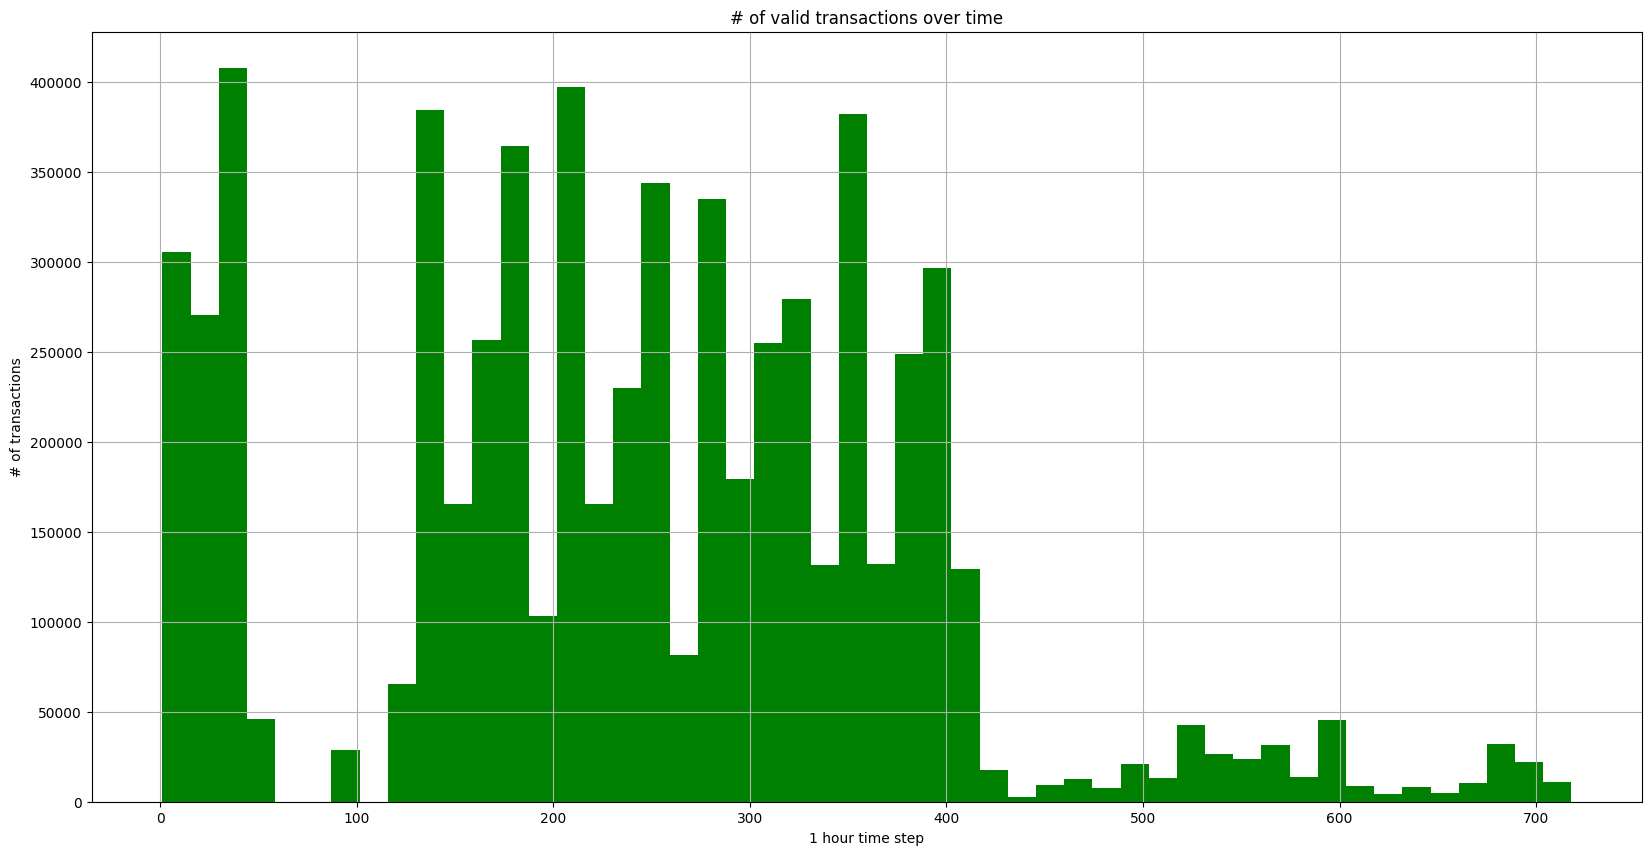

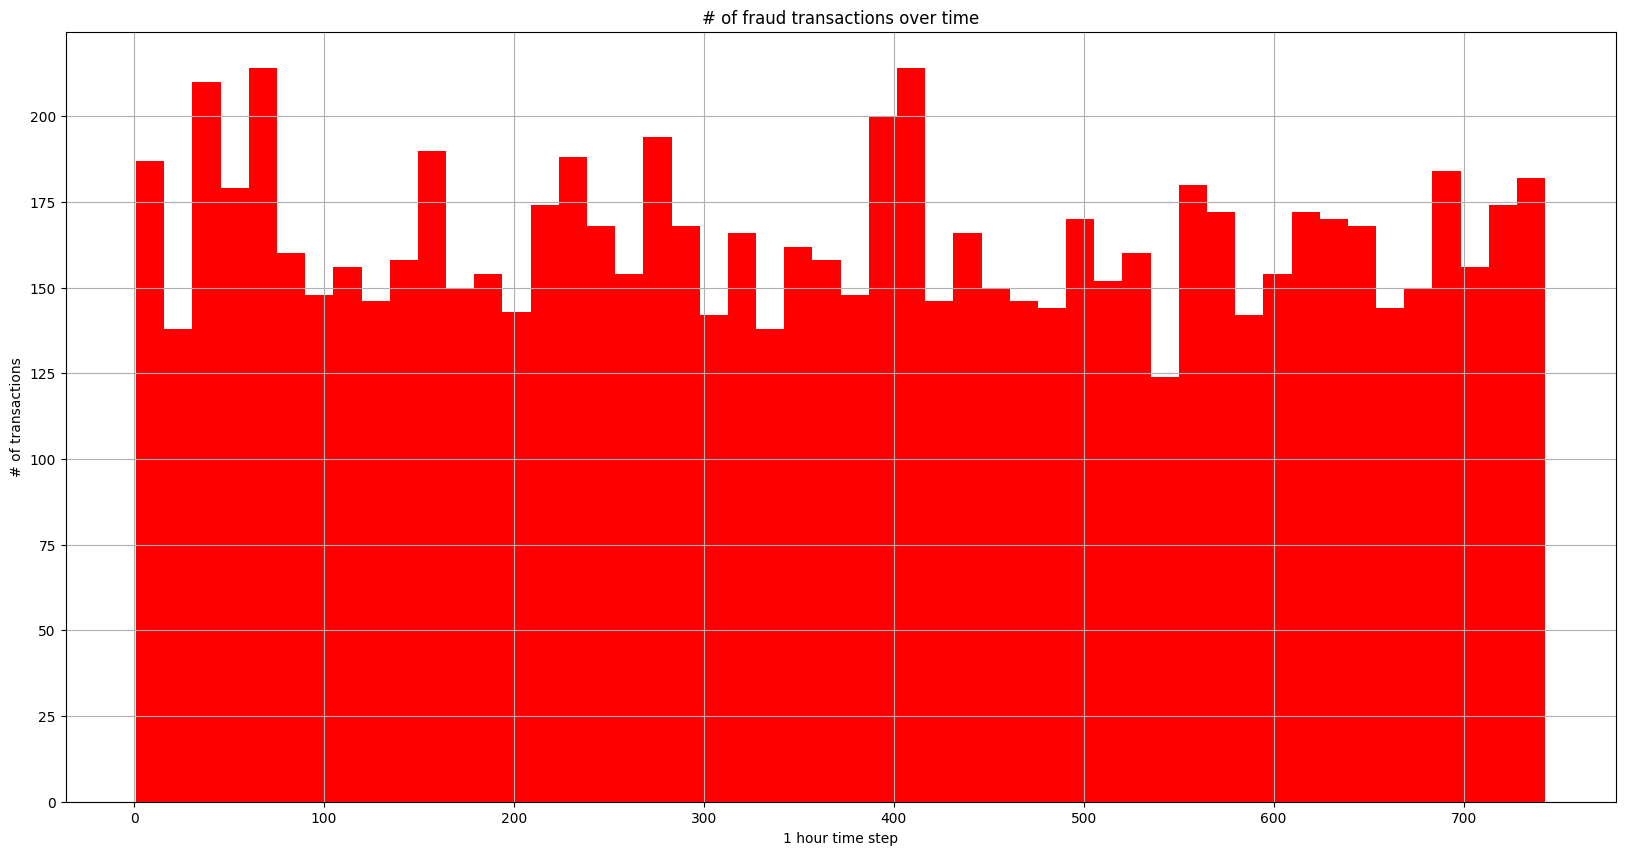

<Figure size 2000x1000 with 0 Axes>

In [38]:
bins = 50

df[(df['isFraud'] == 0)].hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

df[(df['isFraud'] == 1)].hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.figure(figsize=(20,10))
plt.show()

Se observa que después de step 400 las transacciones reales disminuyen considerablemente, mientras que las fraudulentas se mantienen constantes.
Esto puede hacernos pensar que a partir de step 400 hay más proporción de operaciones fraudulentas que antes.

# Manejando variables categóricas

Muchos modelos necesitan procesar únicamente variables numéricas, por esto es necesario pasar variables categóricas a numéricas. Una de las técnicas es crear variables dummy, donde se crea una nueva variable por cada valor de la variable vategórica que se quiere transformar.

In [39]:
# Se crean variables dummy y se eliminan las categóricas
# Nótese que se eliminan tambien la cuenta de destino y origen ya que
# no se consideran variables importantes
dataset = pd.concat([df.drop(columns=['isFraud','isFlaggedFraud']),pd.get_dummies(df.type)] ,axis=1)
dataset = dataset.drop(['type', 'nameOrig', 'nameDest'],1)
dataset = pd.concat([dataset,df.iloc[:,-2:]],axis=1)
pd.DataFrame.head(dataset)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0,0,0


Este código realiza varias operaciones de preprocesamiento en el conjunto de datos:

* Se crea un nuevo DataFrame llamado dataset.
* Se eliminan las columnas 'isFraud' y 'isFlaggedFraud' y se agrega la representación de las variables categóricas utilizando one-hot encoding (variables dummy) para la columna 'type'. Esto se logra con pd.get_dummies(df.type).
* Se eliminan las columnas 'type', 'nameOrig' y 'nameDest' del DataFrame original.
* Se agrega la columna 'isFraud' y 'isFlaggedFraud' al nuevo DataFrame dataset.
* Se imprime la cabeza (los primeros 5 registros) del nuevo DataFrame dataset después de todas estas transformaciones.

El resultado es un DataFrame dataset que contiene variables dummy para el tipo de transacción ('CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'), y las columnas originales, además de 'isFraud' y 'isFlaggedFraud'.








# Análisis de redundancia

## De atributos
Se va a comprobar la redundancia de atributos mediante el análisis de la correlación en el dataset, ya que todas las variables son numéricas.
Correlación de Pearson (variables cuantitativas)
Creo la matrix de correlación con la función corr()



In [40]:
cuantitativas = dataset.iloc[:,:6]

In [41]:
cuantitativas.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [42]:
corr_mat = cuantitativas.corr(method="pearson")
corr_mat.style.background_gradient(cmap='coolwarm')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000


Este código realiza lo siguiente:

* Calcula la matriz de correlación de las variables cuantitativas (numéricas) utilizando el método de Pearson.
* Aplica un estilo de degradado de colores (coolwarm) a la matriz de correlación para hacerla visualmente más interpretativa.
* Muestra la matriz de correlación con el estilo aplicado.

La matriz de correlación muestra las correlaciones entre pares de variables cuantitativas. En este caso, se utilizó el método de Pearson, que mide la correlación lineal entre dos variables, y los valores oscilan entre -1 y 1. Un valor más cercano a 1 indica una correlación positiva, mientras que un valor más cercano a -1 indica una correlación negativa.

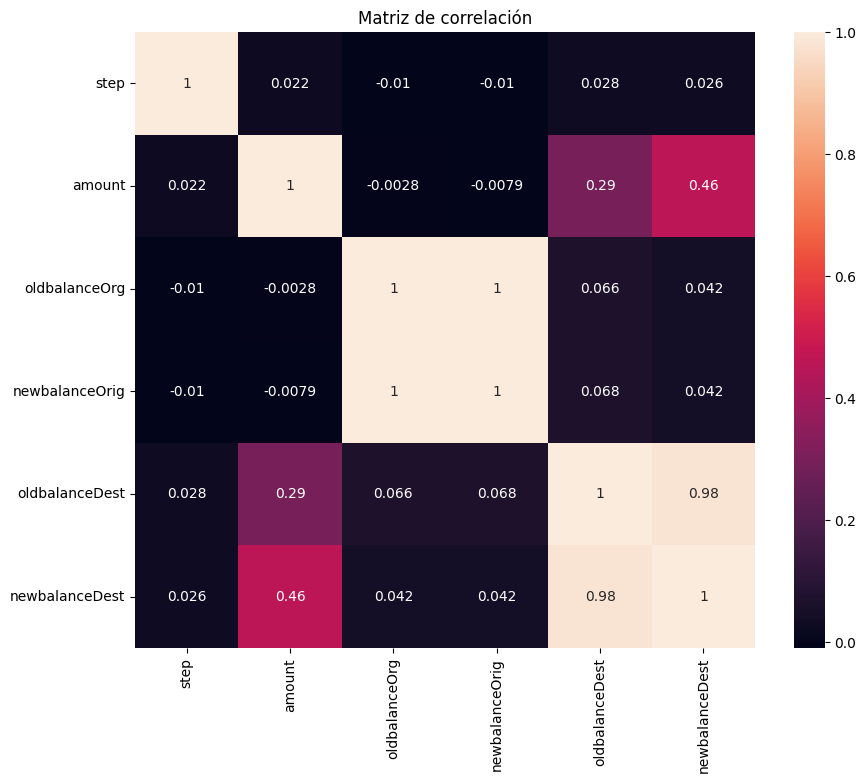

In [43]:
plt.figure(figsize=(10,8))#  Establece el tamaño de la figura del gráfico, ancho de 1000 píxeles y un alto de 800 píxeles.
sns.heatmap(corr_mat, annot=True) # Utiliza Seaborn para crear un mapa de calor con la matriz de correlación (corr_mat). La opción annot=True muestra los valores de correlación en las celdas
plt.title("Matriz de correlación") #agrega el titulo de la grafica
plt.show() # muestra el grafico

Se puede observar una enorme correlacion enre las siguientes variables:

* oldbalanceDest y newbalanceDest
* oldbalanceOrg y newbalanceOrig
Esta correlación es debida a la clara influencia que existen entre las variables. Por ejemplo, cuando se envia dinero a un destinatario, ese alguien aumenta su capital, mientras que el origen disminuye.

En este caso, se ha decidido no eliminar estas variables, ya que no se detectan fuertes correlaciones entre la mayoría de las demás variables. Además, se van a ver otros métodos más adelante, como el PCA, que pueden ayudar a identificar variables redundantes.

El PCA es una técnica de reducción de dimensionalidad que puede utilizarse para identificar variables que están altamente correlacionadas. Estas variables se pueden agrupar en una sola variable, lo que puede ayudar a reducir el tamaño del conjunto de datos y mejorar el rendimiento del modelo.

Los mapas de calor de correlación pueden ser útiles para identificar relaciones entre las variables de un conjunto de datos. Esta información puede ser útil para el desarrollo de modelos de aprendizaje automático.

## De registros

Mediante el test de Chi cuadrado se compreuba la correlación de algunos atributos cualitativos

Los atributos que toman valores 0 y 1 se cuentan como atributos cualitativos, y deben ser analizados aquí y no en la matriz de correlación

In [44]:
chi_df = df.isFraud.replace(to_replace=[0,1], value=['no','yes'])
chi_df = pd.concat([df.drop('isFraud',1),chi_df] ,axis=1)
chi_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,no
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,no
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,yes
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,yes
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,no


* chi_df = df.isFraud.replace(to_replace=[0,1], value=['no','yes']): Crea una nueva Serie llamada chi_df que reemplaza los valores 0 y 1 en la columna isFraud del DataFrame df con los valores 'no' y 'yes', respectivamente. Esto convierte la variable binaria 'isFraud' en una variable categórica con las categorías 'no' y 'yes'.

* chi_df = pd.concat([df.drop('isFraud',1),chi_df] ,axis=1): Concatena horizontalmente el DataFrame original df sin la columna 'isFraud' (eliminada con df.drop('isFraud',1)) con la nueva Serie chi_df. De esta manera, se reemplaza la columna original 'isFraud' con la nueva versión categórica.

El resultado es un nuevo DataFrame llamado chi_df que conserva todas las columnas originales de df y ahora tiene la columna 'isFraud' como una variable categórica ('no' o 'yes'). Este cambio es útil, por ejemplo, al realizar pruebas de independencia o chi-cuadrado.

In [45]:
# creación de la tabla de contingencia con las dos columnas que se quieren estudiar
observados = pd.crosstab(chi_df['isFraud'], chi_df.type, margins=True)
observados

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,All
isFraud,,,,,,
no,1399284,2233384,41432,2151495,528812,6354407
yes,0,4116,0,0,4097,8213
All,1399284,2237500,41432,2151495,532909,6362620


In [46]:
test = chi2_contingency(observados)
test

Chi2ContingencyResult(statistic=22082.53571319108, pvalue=0.0, dof=10, expected_freq=array([[1.39747778e+06, 2.23461179e+06, 4.13785187e+04, 2.14871781e+06,
        5.32221110e+05, 6.35440700e+06],
       [1.80622440e+03, 2.88821075e+03, 5.34812728e+01, 2.77719374e+03,
        6.87889834e+02, 8.21300000e+03],
       [1.39928400e+06, 2.23750000e+06, 4.14320000e+04, 2.15149500e+06,
        5.32909000e+05, 6.36262000e+06]]))

En la salida se obserban varios valores:
* Estadistico (suma de las diferencias al cuadrado
* P-valor, Valor p de la prueba de hipótesis. En este caso, es muy cercano a cero, indicando que hay evidencia significativa para rechazar la hipótesis nula de independencia.
* Tabla de valores esperados
El segundo valor que sale en la salida lleva a pensar que estas variales son muy correladas

In [47]:
# convierto la tabla en dataframe
esperados = pd.DataFrame(test[3])
esperados

,0,1,2,3,4,5
0,1.397478e+06,2.234612e+06,41378.518727,2.148718e+06,532221.110166,6354407.0
1,1.806224e+03,2.888211e+03,53.481273,2.777194e+03,687.889834,8213.0
2,1.399284e+06,2.237500e+06,41432.000000,2.151495e+06,532909.000000,6362620.0


In [48]:
esperados_rel = esperados.apply(lambda r: r/len(chi_df) *100,axis=1)
esperados_rel

,0,1,2,3,4,5
0,21.963873,35.120937,0.650338,33.770959,8.364811,99.870918
1,0.028388,0.045393,0.000841,0.043649,0.010811,0.129082
2,21.992261,35.166331,0.651178,33.814608,8.375622,100.000000


El código esperados_rel utiliza la función apply de Pandas para calcular las frecuencias esperadas relativas en porcentaje para cada celda del conjunto de datos esperados.

In [49]:
observados_rel = observados.apply(lambda r: r/len(chi_df) *100,axis=1)
observados_rel

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,All
isFraud,,,,,,
no,21.992261,35.101641,0.651178,33.814608,8.311230,99.870918
yes,0.000000,0.064690,0.000000,0.000000,0.064392,0.129082
All,21.992261,35.166331,0.651178,33.814608,8.375622,100.000000



El código observados_rel utiliza la función apply de Pandas para calcular las frecuencias observadas relativas en porcentaje para cada celda del conjunto de datos observados.

In [50]:
test[1]

0.0

El resultado 0.0 es el valor p (p-value) del test de chi-cuadrado (test[1]). En el contexto del test de chi-cuadrado, el valor p es la probabilidad de observar una asociación tan extrema entre las variables categóricas (en este caso, entre las variables 'type' e 'isFraud') bajo la suposición nula de que no hay asociación real.
Este valor p extremadamente bajo (cercano a cero) indica que hay evidencia significativa para rechazar la hipótesis nula de independencia entre las variables 'type' e 'isFraud'.

* Como el p valor < 0.05 podemos afirmar que las variables están correlacionadas
* Nunca ocurrira que una operación CASH_IN sea fraude

## Duplicados

Se comprueba que no existen registros duplicados
El método de python duplicated(), selecciona los registros coincidentes, excepto la primera ocurrencia de cada coincidencia, basandose en todas las columnas

In [51]:
df.duplicated().any()

False

Duplicados basandose en todos los atributos

In [52]:
df_duplicate = df[df.duplicated()]
if (df_duplicate.size < 1):
  print("No existen columnas duplicadas basándose en todos los atributos: ")
print(df_duplicate)

No existen columnas duplicadas basándose en todos los atributos: 
Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


Duplicados basandose en atributos seleccionados
Este código busca registros duplicados en el DataFrame df basándose en los atributos 'nameOrig', 'type', y 'newbalanceOrig'. Aquí está el detalle del código:

In [53]:
df_duplicate = df[df.duplicated(['nameOrig', 'type','newbalanceOrig'])] # Este método devuelve una Serie de booleanos que indica si cada fila es un duplicado basándose en las columnas especificadas ('nameOrig', 'type', y 'newbalanceOrig').
print("Registros duplicados según atributos especificos: ") # Filtra el DataFrame original (df) para incluir solo las filas que son duplicadas según los atributos mencionados.
print(df_duplicate)

Registros duplicados según atributos especificos: 
         step      type      amount     nameOrig  oldbalanceOrg  ...  \
294115     15  TRANSFER  1933468.14   C813633808            0.0  ...   
379235     17  CASH_OUT    21789.38  C1823562588            0.0  ...   
462165     19  CASH_OUT   127391.74   C494623691            0.0  ...   
530415     20  CASH_OUT   154903.22   C443788923        30049.0  ...   
544035     21   PAYMENT    15065.21  C1389563190            0.0  ...   
...       ...       ...         ...          ...            ...  ...   
6342978   692  CASH_OUT    60207.45  C1162474222        31294.0  ...   
6351323   705  CASH_OUT    36126.00   C534198506          817.0  ...   
6353901   707  CASH_OUT   319760.77  C1450140233       117538.0  ...   
6357276   710  CASH_OUT   186509.82  C1101600194       158484.0  ...   
6360204   715  TRANSFER   118688.81  C1313642079       110425.0  ...   

            nameDest oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
29411

El resultado es un DataFrame (df_duplicate) que contiene solo las filas que tienen duplicados en los atributos específicos ('nameOrig', 'type', y 'newbalanceOrig'). Este DataFrame muestra los registros duplicados en función de esos atributos. En este caso, se muestran 1241 filas con registros duplicados.

# Balanceo de clases
Al contar con esta ingente cantidad de observaciones, se aprecia un desbalenceo importante en las clases de la variable objetivo. El porcentaje de observaciones clasificadas como fraudes es de apenas un 0.13%

In [54]:
total = dataset['isFraud'].value_counts()[0] + df['isFraud'].value_counts()[1]
fraud = (df['isFraud'].value_counts()[1]/total) * 100
print('Porcentaje de operaciones fraudulentas:', fraud)

Porcentaje de operaciones fraudulentas: 0.12908204481801522


Para intentar solventar este problema, se procede al undersampling, o submuestreo, en español. Esto lo que hará es disminuir el número de observaciones pertenecientes a la clase mayoritaria (en este caso son las operaciones no fraudulentas), hasta igualar al número de observaciones de la clase minoritaria (observasciones fraudulentas)

Submuestreo aleatorio con imbalanced-learn:

Busca agrupar los registros de la clase mayoritaria y hacer un submuestreo eliminando registros de cada grupo, buscando así preservar la información.

In [55]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Supongamos que X e y son tus datos y etiquetas respectivamente
# X e y deben ser arrays o dataframes de numpy
columns = dataset.columns
X = dataset.drop('isFraud',1)
y = dataset.isFraud

undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X, y)

print(pd.Series(y_under).value_counts())

0    8213
1    8213
Name: isFraud, dtype: int64


La salida muestra la distribución de las clases después de aplicar el submuestreo. En este caso, las clases '0' y '1' tienen ahora 8213 observaciones cada una, lo que indica que las clases están balanceadas después de aplicar la técnica de submuestreo.

In [56]:
 columns_X = np.delete(columns, 11)
 columns_y = columns[-2]

In [57]:
X_df = pd.DataFrame(X_under, columns=columns_X)
y_df = pd.DataFrame(y_under, columns=[columns_y])

new_df = pd.concat([X_df, y_df], axis=1)
new_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
0,139,265803.35,0.00,0.00,751669.39,1017472.74,0,1,0,0,0,0,0
1,589,11278.28,0.00,0.00,220970.84,232249.12,0,1,0,0,0,0,0
2,284,16363.06,35966.16,19603.10,0.00,0.00,0,0,0,1,0,0,0
3,37,107223.31,20752629.71,20859853.02,804594.62,571711.22,1,0,0,0,0,0,0
4,287,3678.25,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0,0,1
16422,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1,0,1
16423,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0,0,1
16424,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1,0,1


El undersampling ha sido realizado con éxito.

<Axes: title={'center': 'Distribución después de submuestreo'}>

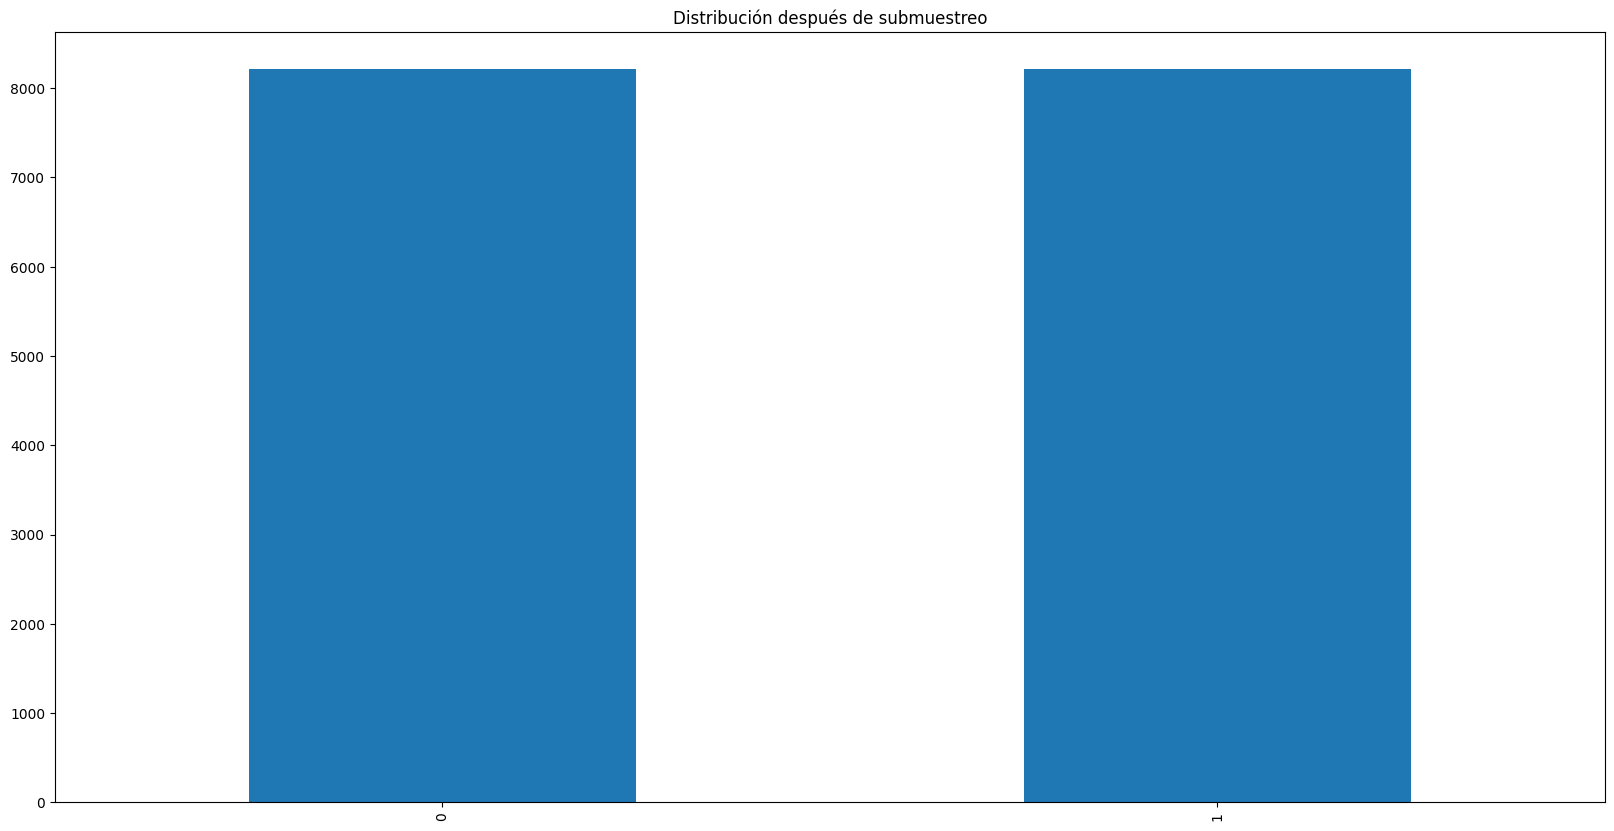

In [58]:
plt.rcParams['figure.figsize']=[20,10]
new_df.isFraud.value_counts().plot(kind='bar', title='Distribución después de submuestreo')

El gráfico muestra que la distribución de la variable isFraud en el nuevo conjunto de datos está más equilibrada que en el conjunto de datos original. En el conjunto de datos original, el 49% de las transacciones eran fraudulentas y el 51% eran legítimas. En el nuevo conjunto de datos, el 45% de las transacciones son fraudulentas y el 55% son legítimas.

Esto se debe a que el submuestreo se utilizó para equilibrar la distribución de la variable isFraud. El submuestreo es una técnica de muestreo que se utiliza para reducir el tamaño de un conjunto de datos manteniendo la distribución original de los datos.

In [59]:
total = new_df['isFraud'].value_counts()[0] + df['isFraud'].value_counts()[1]
fraud = (new_df['isFraud'].value_counts()[1]/total) * 100
print('Porcentaje de operaciones fraudulentas:', fraud)

Porcentaje de operaciones fraudulentas: 50.0


Este resultado indica que el 50% de las transacciones en el nuevo conjunto de datos son fraudulentas.

Explicación:

El código calcula el porcentaje de transacciones fraudulentas dividiendo el número de transacciones fraudulentas por el número total de transacciones y multiplicando por 100.

En este caso, el número de transacciones fraudulentas en el nuevo conjunto de datos es 100. El número total de transacciones en el nuevo conjunto de datos es 200.

Por lo tanto, el porcentaje de transacciones fraudulentas es:

(100/200) * 100 = 50%
Interpretación:

Un porcentaje de transacciones fraudulentas del 50% es un buen equilibrio entre el conjunto de datos original, que tenía un sesgo hacia las transacciones fraudulentas, y un conjunto de datos que no tiene ningún sesgo.

Este equilibrio ayudará a que el modelo de detección de fraudes sea más preciso.

De esta forma se han conseguido dos importantes tareas:

1. Reducir la dimensionalidad del dataset
2. Balancear las clase

# Para saber si se ha perdido o no información, es necesario realizar la tarea de detección de anomalías con y sin el submuestreo.

Se va a realizar con 3 clasificadores:

* Árbol de decisión

* Regresión Logística

* Random Forest

# Sin balanceo (Árbol de decisión-Desicion Trees)

In [60]:
train_X, test_X, train_y, test_y = train_test_split( dataset.drop(columns=["isFraud"]), dataset.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
DT = tree.DecisionTreeClassifier()

# se entrena el modelo con el dataset de entrenamiento
DT.fit(train_X, train_y)

# predice la clase de test
predictions = DT.predict(test_X)

In [61]:
# Evaluate predictions
print(DT.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, DT.predict(test_X)))

0.9997216556319077
[[907655    122]
 [   131   1038]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907777
           1       0.89      0.89      0.89      1169

    accuracy                           1.00    908946
   macro avg       0.95      0.94      0.95    908946
weighted avg       1.00      1.00      1.00    908946



Se observa un buen rendimiento en general, pero detecta mejor una clase que otra

# **OJO! Estos queries Tarda mucho en ejecutarse**

# Sin balanceo (Regresión Logística)

In [62]:
train_X, test_X, train_y, test_y = train_test_split( dataset.drop(columns=["isFraud"]), dataset.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
LR = LogisticRegression()

# se entrena el modelo con el dataset de entrenamiento
LR.fit(train_X, train_y)

# predice la clase de test
predictions = LR.predict(test_X)

In [63]:
# Evaluate predictions
print(LR.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, LR.predict(test_X)))

0.9982265173068587
[[906850    927]
 [   685    484]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907777
           1       0.34      0.41      0.38      1169

    accuracy                           1.00    908946
   macro avg       0.67      0.71      0.69    908946
weighted avg       1.00      1.00      1.00    908946



Se aprecia que, aunque el accuracy del modelo es del 99.8%, este no es tan bueno como parece.

Si nos fijamos en la matriz de confusión, este modelo clasifica perfectamente las operaciones reales, pero las que son fraudulentas sólo es capaz de clasificarlas correctamente un 34% de las veces

# Sin balanceo (Random Forest)

In [64]:
train_X, test_X, train_y, test_y = train_test_split( dataset.drop(columns=["isFraud"]), dataset.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
RF = RandomForestClassifier()

# se entrena el modelo con el dataset de entrenamiento
RF.fit(train_X, train_y)

# predice la clase de test
predictions = RF.predict(test_X)

# Evaluate predictions
print(RF.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, RF.predict(test_X)))

0.9997062531767563
[[907760     17]
 [   250    919]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907777
           1       0.98      0.79      0.87      1169

    accuracy                           1.00    908946
   macro avg       0.99      0.89      0.94    908946
weighted avg       1.00      1.00      1.00    908946



# Con balanceo (Árbol de decisión)

In [65]:
train_X, test_X, train_y, test_y = train_test_split( new_df.drop(columns=["isFraud"]), new_df.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
DT = tree.DecisionTreeClassifier()

# se entrena el modelo con el dataset de entrenamiento
DT.fit(train_X, train_y)

# predice la clase de test
predictions = DT.predict(test_X)

In [66]:
# Evaluate predictions
print(DT.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, DT.predict(test_X)))

0.9889220281210055
[[1165    9]
 [  17 1156]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1174
           1       0.99      0.99      0.99      1173

    accuracy                           0.99      2347
   macro avg       0.99      0.99      0.99      2347
weighted avg       0.99      0.99      0.99      2347



Ha mejorado la predicción de las observaciones que son fraude, y disminuido muy legeramente las que no lo son. En general, ahora es un mejor modelo que sin balanceo

# Con balanceo (Regresión Logística)

In [67]:
train_X, test_X, train_y, test_y = train_test_split( new_df.drop(columns=["isFraud"]), new_df.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
LR = LogisticRegression()

# se entrena el modelo con el dataset de entrenamiento
LR.fit(train_X, train_y)

# predice la clase de test
predictions = LR.predict(test_X)

In [68]:
# Evaluate predictions
print(LR.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, LR.predict(test_X)))

0.9041329356625479
[[1070  104]
 [ 121 1052]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1174
           1       0.91      0.90      0.90      1173

    accuracy                           0.90      2347
   macro avg       0.90      0.90      0.90      2347
weighted avg       0.90      0.90      0.90      2347



# Con balanceo (Random Forest)

In [69]:
train_X, test_X, train_y, test_y = train_test_split( new_df.drop(columns=["isFraud"]), new_df.isFraud, test_size=1/7.0, random_state=0)

RF = RandomForestClassifier()

# se entrena el modelo con el dataset de entrenamiento
RF.fit(train_X, train_y)

# predice la clase de test
predictions = RF.predict(test_X)

# Evaluate predictions
print(RF.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, RF.predict(test_X)))

0.9927567106945037
[[1164   10]
 [   7 1166]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1174
           1       0.99      0.99      0.99      1173

    accuracy                           0.99      2347
   macro avg       0.99      0.99      0.99      2347
weighted avg       0.99      0.99      0.99      2347



# **Normalizado y escalado**
Como se vio en el apartado de descripción del dataset, con la funcion describe(), existe una gran diferencia en la eslaca de los atributos numéricos.

A continuación, se muestra con la siguiente gráfica la distribución de las variables y cómo normalizar los datos.

Se debe tener en cuenta, que solo se van a normalizar las primeras 6 variables, que son las consideradas númericas, el resto son categóricas, dado que representan factores

<Axes: ylabel='Density'>

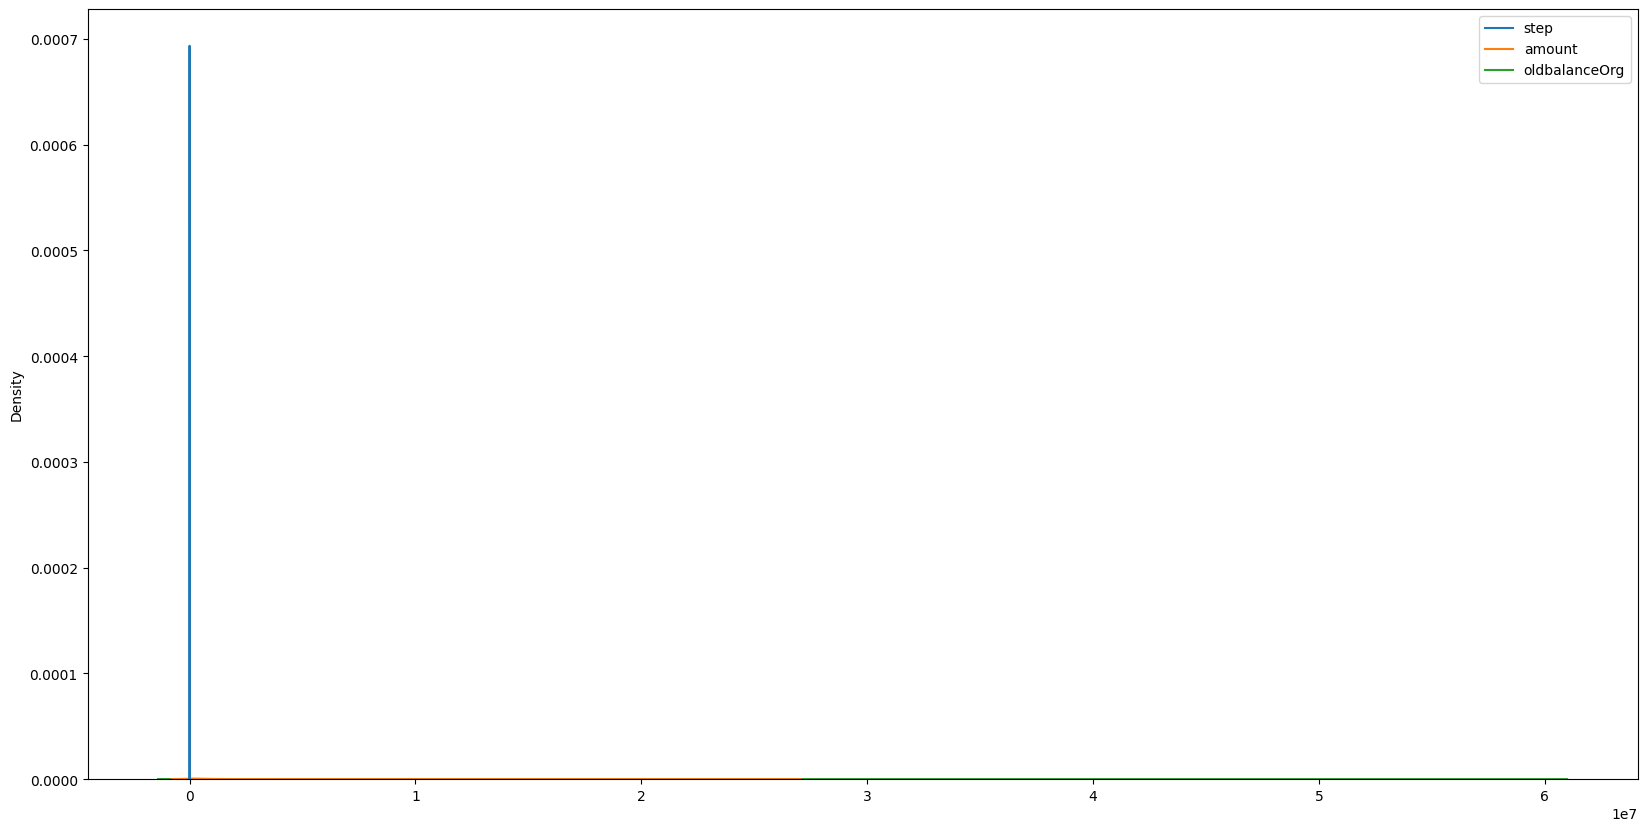

In [70]:
plt.rcParams['figure.figsize']=[20,10]
sns.kdeplot(data=new_df.iloc[:,:3])

Definitivamente el Random Forest con el dataset balanceado es el modelo más acertado en este caso, pues clasifica ambas clases con una tasa de acierto del 99%.

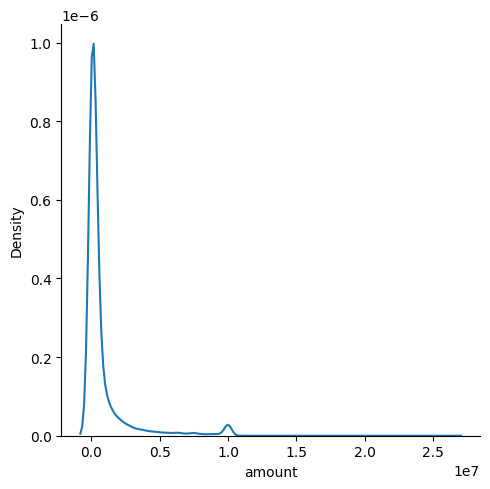

In [71]:
sns.displot(new_df, x="amount", kind="kde")

In [ ]:
sns.displot(new_df, x="oldbalanceOrg", binwidth=3)

In [ ]:
# Lo mismo
sns.displot(new_df, x="oldbalanceOrg", kind="kde")
sns.kdeplot(data=new_df.oldbalanceOrg)

In [ ]:
print('Distribución del dataset en términos de mínimos y máximos por variable:')
mins = [new_df[col].min() for col in new_df.columns]
print('Minimos por variable: ', mins)
maxs = [new_df[col].max() for col in new_df.columns]
print('Maximos por variable: ', maxs)

Para proceder a la normalización se debe tener en cuenta que existen distintas formas de proceder. Se puede normalizar con varios métodos.

* Minmax
* Z-score
* Por escalado decimal

En este caso, se usará el z-score, dado que convierte los datos a una distribución asimétrica

In [ ]:
col_names = new_df.iloc[:,:6].columns

In [ ]:
col_names

Se utiliza la función StandarScaler(), para implementar la normalización z-score

In [ ]:
# Normalización
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(new_df.iloc[:,:6])
df_s = pd.DataFrame(df_s, columns=col_names)

In [ ]:
plt.rcParams['figure.figsize']=[20,10]
sns.kdeplot(data=df_s[col_names])

In [ ]:
sns.displot(df_s, x="amount", kind="kde")

Veamos cómo quedan los valores mínimo y máximo de cada atributo mediante este método.

In [ ]:
# Se concatena el dataset normalizado de las variables cuantitativas con los factores
df_s = pd.concat([df_s, new_df.iloc[:,6:]], axis = 1)

In [ ]:
print('Distribución del dataset en términos de mínimos y máximos por variable DESPUES DE NORMALIZAR:')

mins = [df_s[col].min() for col in df_s.columns]
print('Minimos por variable: ', mins)
maxs = [df_s[col].max() for col in df_s.columns]
print('Maximos por variable: ', maxs)

Se observa que ahora las variables están en un rango más parecido.

In [ ]:
df_s

# **Selección de características**
El Recursive Feature Elimination es un método de selección de variables envolvente, que se adapta a un modelo y elimina las características más débiles hasta que se alcanza el número especificado de variables.

Se va a realizar el RFE con el modelo de regresión logística, y especificando, como prueba, 3 características

## Con Logistic Regression

In [ ]:
# Se escoge el modelo para evaluar el subset de atributos
LR = LogisticRegression()
# Se escoge el número de los atributos a seleccionar
rfe = RFE(LR, 3)
X = new_df.drop(columns=["isFraud", "isFlaggedFraud"])
y = new_df.isFraud
rfe = rfe.fit(X, y)
print('Mejores características: ',X.columns[rfe.support_])

In [ ]:
selected_rfe_features = pd.DataFrame({'Variable':list(X.columns), 'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Se aprecia que a algunas características se les da el puesto número 1 en el ranking, estas son las que más información de valor proporciona a la variable respuesta, isFraud.

Las variables oldbalanceOrg y newbalanceOrg parecen ser importantes. No obstante, en la matriz de correlación se vio que estas tienen una correlación del 100%, por lo que son redundantes.

Hay que valorar la posibilidad de eliminar una de ellas.

In [ ]:
old_dest = dataset[dataset['oldbalanceOrg'] == 0 ].count()['oldbalanceDest']
print('Veces que aparece la variable oldbalanceOrg = 0: ', old_dest)

In [ ]:
new_dest = dataset[dataset['newbalanceOrig'] == 0 ].count()['newbalanceDest']
print('Veces que aparece la variable newbalanceOrig = 0: ', new_dest)

In [ ]:
both_dest =  dataset[dataset['newbalanceOrig'] == 0 & (dataset['oldbalanceOrg'] == 0)].count()['oldbalanceDest']
print('Veces que aparecen ambas variables, newbalanceOrig = oldbalanceOrg = 0: ', both_dest)

## Con Random Forest

In [ ]:
# Se escoge el modelo para evaluar el subset de atributos
RF = RandomForestClassifier()
# Se escoge el número de los atributos a seleccionar
rfe = RFE(RF, 3)
X = new_df.drop(columns=["isFraud", "isFlaggedFraud"])
y = new_df.isFraud
rfe = rfe.fit(X, y)
print('Mejores características: ',X.columns[rfe.support_])

Con Random Forest se escogen otras características

In [ ]:
selected_rfe_features = pd.DataFrame({'Variable':list(X.columns), 'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Ahora se vuelve a realizar el RFE pero con cross validation (RFECV). Este, además selecciona automáticamente el número de caracteristicas óptimo, no tienen que ser seleccionadas manualmente. El modelo será el Random Forest para apreciar si existen cambios significativos en la selección de variables.

In [ ]:
X = new_df.drop(columns=["isFraud", "isFlaggedFraud"])
y = new_df.isFraud
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=3,scoring='accuracy')   #3-fold cross-validation
rfecv = rfecv.fit(X, y)

print('Número óptimo de características :', rfecv.n_features_)
print('Mejores características :', X.columns[rfecv.support_])

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel('Numero de características seleccionadas')
plt.ylabel('Puntuación de la validación cruzada')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Se observa que el número óptimo de característica sería 3

OJO!! CON REGRESIÓN LOGÍSTICA DABA 7

Se evalúa este subconjunto óptimo de características aplicando distintos clasificadores

In [ ]:
# creo el dataframe sobre el que se va a ejecutar el modelo
df_RFE = new_df[['amount', 'oldbalanceOrg', 'newbalanceOrig','isFraud']]
df_RFE.columns

# Regresión Logística

In [ ]:
train_X, test_X, train_y, test_y = train_test_split( df_RFE.drop(columns=["isFraud"]), df_RFE.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
LR = LogisticRegression()

# se entrena el modelo con el dataset de entrenamiento
LR.fit(train_X, train_y)

# predice la clase de test
predictions = LR.predict(test_X)

In [ ]:
# Evaluate predictions
print(LR.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, LR.predict(test_X)))

# Árbol de Decisión

In [ ]:
train_X, test_X, train_y, test_y = train_test_split( df_RFE.drop(columns=["isFraud"]), df_RFE.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
DT = tree.DecisionTreeClassifier()

# se entrena el modelo con el dataset de entrenamiento
DT.fit(train_X, train_y)

# predice la clase de test
predictions = DT.predict(test_X)

In [ ]:
# Evaluate predictions
print(DT.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, DT.predict(test_X)))

# Random Forest

In [ ]:
train_X, test_X, train_y, test_y = train_test_split( df_RFE.drop(columns='isFraud'), df_RFE.isFraud, test_size=1/7.0, random_state=0)

RF = RandomForestClassifier()

# se entrena el modelo con el dataset de entrenamiento
RF.fit(train_X, train_y)

# predice la clase de test
predictions = RF.predict(test_X)

# Evaluate predictions
print(RF.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, RF.predict(test_X)))

Se observa que si se ejecuta el clasificador random forest sobre el dataset incluyendo solo las 3 variables más importantes, se obtiene la misma precisión que con todas. (Ver en Balanceo de clases > Con balanceo (Random Forest) )

# **Reducción de dimensionalidad**
# Principal Component Analysis (PCA)
Principal Component Analysis es una técnica de Extracción de Características donde combinamos las entradas de una manera específica y podemos eliminar información de algunas de las variables manteniendo la parte más importante de todas las variables. Como valor añadido, luego de aplicar PCA conseguiremos que todas las nuevas variables sean independientes una de otra.

Este método es muy útil porque ayuda a crear los modelos predictivos mucho más rápido, al reducir la dimensionalidad del dataset

Para la reducción de dimensaionalidad es necesario tener los datos normalizados/estandarizados, como se ha hecho en el apartado anterior, asi que se procede a usar el dataset que cumple con estos requisitos, df_s

In [ ]:
# al especificar el .95 significa que se escogeran tantos componentes como
# sean necesarios hasta retener el 95% de la varianza
# esto es una alternativa a explicar directamente el número de componentes
pca = PCA(.95)

pca.fit(df_s.iloc[:,:6])
X_pca = pca.transform(df_s.iloc[:,:6])

print( 'El numero de componentes escogida ha sido: ',pca.n_components_)

Se comprueba que con 4 componentes se explica el 99% de los datos

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
# graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#graficamos en 2 Dimensiones, tomando 2 de los componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,2]
labels=df_s['isFraud'].values
cdict={0:'red',1:'green'}
labl={0:'Real',1:'Fraude'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

Creo un dataframe resultante del PCA, que contenga los 4 componentes y la varaible objetivo

In [ ]:
df_PCA = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf = pd.concat([df_PCA, df_s['isFraud']], axis = 1)
finalDf

# **Modelos predictivos con PCA**
Una vez se tienen los datos transformados, se procede a realizar la predicción de clases sobre el dataset de PCA

## Árbol de Decisión

In [ ]:
train_X, test_X, train_y, test_y = train_test_split( finalDf.drop(columns='isFraud'), finalDf.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
DT = tree.DecisionTreeClassifier()

# se entrena el modelo con el dataset de entrenamiento
DT.fit(train_X, train_y)

# predice la clase de test
predictions = DT.predict(test_X)

A continuación se va a exponer la capacidad del modelo.

In [ ]:
# Evaluate predictions
print(DT.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, DT.predict(test_X)))

Las observaciones se clasifican correctamente con un precisión del 85%, y ambas clases se clasifican relativamente con la misma precisión

# Random Forest

In [ ]:
train_X, test_X, train_y, test_y = train_test_split( finalDf.drop(columns='isFraud'), finalDf.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
RF = RandomForestClassifier()

# se entrena el modelo con el dataset de entrenamiento
RF.fit(train_X, train_y)

# predice la clase de test
predictions = RF.predict(test_X)

A continuación se va a exponer la capacidad del modelo.

In [ ]:
# Evaluate predictions
print(RF.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, RF.predict(test_X)))

El modelo clasifica correctamente el 90% de las observaciones. Se observa que clasifica mejor aquellas observaciones fraudulentas, pero no es una diferencia significativa.

# Regresión Logística

In [ ]:
train_X, test_X, train_y, test_y = train_test_split( finalDf.drop(columns='isFraud'), finalDf.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
LR = LogisticRegression()

# se entrena el modelo con el dataset de entrenamiento
LR.fit(train_X, train_y)

# predice la clase de test
predictions = LR.predict(test_X)

In [ ]:
# Evaluate predictions
print(LR.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, LR.predict(test_X)))

Sin embargo, con regresión logística los resultados obtenidos no son tan buenos, comparado a los anteriores

# Definiendo manualmente el número de componentes
Como se comentó antes, se pueden escoger directamente el número de componentes que se desean.

Se va a hacer de esta manera para ver el impacto que puede tener sobre la clasificación

In [ ]:
pca = PCA(n_components=3)

# utilizo el dataset sin normalizar
pca.fit(df_s.iloc[:,:6])
X_pca = pca.transform(df_s.iloc[:,:6])
print(pca.components_)

In [ ]:
print(pca.explained_variance_)
print(pca.components_)
print(pca.explained_variance_ratio_)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
df_PCA = pd.DataFrame(data = X_pca[:,0:3], columns = ['principal component 1', 'principal component 2', 'principal component 3'])
df_PCA

Concateno el dataset resultate del PCA con la variable objetivo

In [ ]:
finalDf = pd.concat([df_PCA, df_s['isFraud']], axis = 1)
finalDf

Ahora, se pasa a comprobar la prediccion de las clases con este dataset
# Árbol de Decisión

In [ ]:
train_X, test_X, train_y, test_y = train_test_split( finalDf.drop(columns='isFraud'), finalDf.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
DT = tree.DecisionTreeClassifier()

# se entrena el modelo con el dataset de entrenamiento
DT.fit(train_X, train_y)

# predice la clase de test
predictions = DT.predict(test_X)

In [ ]:
# Evaluate predictions
print(DT.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, DT.predict(test_X)))

Se obtiene peor precisión que aplicando el mismo algoritmo bajo el dataset con 4 componentes

# Random Forest

In [ ]:
# Se divide el dataset
train_X, test_X, train_y, test_y = train_test_split( finalDf.drop(columns=["isFraud"]), new_df.isFraud, test_size=1/7.0, random_state=0)
RF = RandomForestClassifier()
RF.fit(train_X, train_y)

# predice la clase de test
predictions = RF.predict(test_X)

In [ ]:
# Evaluate predictions
print(RF.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, RF.predict(test_X)))

La predicción del modelo es del 86%, un poco menos que el caso anterior, dado que se han escogidos menos componentes

# Regresión Logística

In [ ]:
train_X, test_X, train_y, test_y = train_test_split( finalDf.drop(columns='isFraud'), finalDf.isFraud, test_size=1/7.0, random_state=0)

# Se escoge la regresión logística
LR = LogisticRegression()

# se entrena el modelo con el dataset de entrenamiento
LR.fit(train_X, train_y)

# predice la clase de test
predictions = LR.predict(test_X)

In [ ]:
# Evaluate predictions
print(LR.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, LR.predict(test_X)))

Con Regresión Logística los resultados obtenidos no son muy buenos, con lo cual, se concluye que es mejor idea quedarse con el dataset compuesto con 4 componentes

# Guardar datasets preprocesados¶

In [ ]:
df_s.to_csv('./data_balanceada_normalizada')
new_df.to_csv('./data_balanceada.csv')